In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import glob
import os
import seaborn as sns
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
import warnings
warnings.filterwarnings("ignore")

In [7]:
loan_df = pd.read_csv("loan_result.csv")
#log_df = pd.read_csv("log_data.csv")
user_df = pd.read_csv("user_spec.csv")

In [8]:
loan_df.columns = ["신청서_번호","한도조회_일시","금융사_번호","상품번호","승인한도","승인금리","신청_여부(타겟)"]
loan_df.head()

,신청서_번호,한도조회_일시,금융사_번호,상품번호,승인한도,승인금리,신청_여부(타겟)
0,1748340,2022-06-07 13:05:41,7,191,42000000.0,13.6,NaN
1,1748340,2022-06-07 13:05:41,25,169,24000000.0,17.9,NaN
2,1748340,2022-06-07 13:05:41,2,7,24000000.0,18.5,NaN
3,1748340,2022-06-07 13:05:41,4,268,29000000.0,10.8,NaN
4,1748340,2022-06-07 13:05:41,11,118,5000000.0,16.4,NaN


In [9]:
user_df.columns = ["신청서_번호","유저_번호","유저_생년월일","유저_성별","생성일시","한도조회_당시_유저_신용점수",
                  "연소득","근로형태","입사연월","고용형태","주거소유형태","대출희망금액","대출_목적",
                  "개인회생자_여부","개인회생자_납입_완료_여부","기대출수","기대출금액"]
user_df.head(3)

,신청서_번호,유저_번호,유저_생년월일,유저_성별,생성일시,한도조회_당시_유저_신용점수,연소득,근로형태,입사연월,고용형태,주거소유형태,대출희망금액,대출_목적,개인회생자_여부,개인회생자_납입_완료_여부,기대출수,기대출금액
0,1249046,118218,1985.0,1.0,2022-06-07 06:28:18,660.0,108000000.0,PRIVATEBUSINESS,20151101.0,기타,자가,1000000.0,기타,0.0,NaN,4.0,162000000.0
1,954900,553686,1968.0,1.0,2022-06-07 14:29:03,870.0,30000000.0,PRIVATEBUSINESS,20070201.0,정규직,기타가족소유,30000000.0,대환대출,0.0,NaN,1.0,27000000.0
2,137274,59516,1997.0,1.0,2022-06-07 21:40:22,710.0,30000000.0,FREELANCER,20210901.0,기타,기타가족소유,10000000.0,생활비,0.0,NaN,5.0,15000000.0


In [10]:
user_loan_df = pd.merge(user_df,loan_df,on="신청서_번호",how="inner")

merge_apply = user_loan_df["신청서_번호"].value_counts().index

user_df_isin_loan = user_df[user_df['신청서_번호'].isin(merge_apply)]

loan_df_isin_user = loan_df[loan_df['신청서_번호'].isin(merge_apply)]

##### loan_test에 해당하는 user들의 결측치 확인
- loan에서 예측해야하는 user들이 어느정도 결측치를 가지고 있는지 파악하는 것이 최우선
- 유저_생년월일, 성별, 신용점수, 연소득, 입사연월, 개인회생자 여부, 개인회생자 납입 여부, 기대출수, 기대출금액까지 모두 결측 존재
- 단순히 drop하는 방식의 결측치 처리는 test 해당하는 데이터를 손실시킬 우려가 있음

In [13]:
loan_train_df = loan_df[loan_df["신청_여부(타겟)"].notnull()].reset_index(drop=True)
loan_test_df = loan_df[loan_df["신청_여부(타겟)"].isnull()].reset_index(drop=True)

In [22]:
user_loan_test_df = pd.merge(user_df,loan_test_df,on="신청서_번호",how="right")

merge_apply_test = user_loan_test_df["신청서_번호"].value_counts().index

user_df_isin_loan_test = user_df[user_df['신청서_번호'].isin(merge_apply_test)]

In [27]:
user_df_isin_loan_test.isnull().sum()

신청서_번호                  0
유저_번호                   0
유저_생년월일              2603
유저_성별                2603
생성일시                    0
한도조회_당시_유저_신용점수     14652
연소득                     1
근로형태                    0
입사연월                23902
고용형태                    0
주거소유형태                  0
대출희망금액                  0
대출_목적                   0
개인회생자_여부             1110
개인회생자_납입_완료_여부     187775
기대출수                30522
기대출금액               50922
dtype: int64

##### merge_apply : user와 loan에서 공통으로 존재하는 신청서 모음
- user_df_isin_loan : user_df 데이터 중에서 loan에도 존재하는 신청서 관련 user 데이터
- loan_df_isin_user : loan_df 데이터 중에서 user에도 존재하는 신청서 관련 loan 데이터

In [12]:
user_df_isin_loan.isnull().sum()

신청서_번호                  0
유저_번호                   0
유저_생년월일              8593
유저_성별                8593
생성일시                    0
한도조회_당시_유저_신용점수     81769
연소득                     1
근로형태                    0
입사연월                92314
고용형태                    0
주거소유형태                  0
대출희망금액                  0
대출_목적                   0
개인회생자_여부           417763
개인회생자_납입_완료_여부     843993
기대출수               146290
기대출금액              225046
dtype: int64

#### 대출 금액 및 개수 부분 결측치 처리
- (가설) 대출종류, 대출희망금액 <-> 기대출수, 기대출금액 간의 연관성이 있을 것이다
- numeric 데이터 간의 선형적인 상관관계는 없어보인다

In [62]:
user_df_isin_loan.head(3)

,신청서_번호,유저_번호,유저_생년월일,유저_성별,생성일시,한도조회_당시_유저_신용점수,연소득,근로형태,입사연월,고용형태,주거소유형태,대출희망금액,대출_목적,개인회생자_여부,개인회생자_납입_완료_여부,기대출수,기대출금액
1,954900,553686,1968.0,1.0,2022-06-07 14:29:03,870.0,30000000.0,PRIVATEBUSINESS,20070201.0,정규직,기타가족소유,30000000.0,대환대출,0.0,NaN,1.0,27000000.0
2,137274,59516,1997.0,1.0,2022-06-07 21:40:22,710.0,30000000.0,FREELANCER,20210901.0,기타,기타가족소유,10000000.0,생활비,0.0,NaN,5.0,15000000.0
3,1570936,167320,1989.0,1.0,2022-06-07 09:40:27,820.0,62000000.0,EARNEDINCOME,20170101.0,정규직,자가,2000000.0,생활비,0.0,NaN,7.0,344000000.0


##### nomial data 인코딩하기

In [65]:
from sklearn.preprocessing import LabelEncoder

encoder_lst = []

user_df_isin_loan_encode = user_df_isin_loan.copy()

for col in ["근로형태","고용형태","주거소유형태","대출_목적"]:
    
    le_encoder = LabelEncoder()
    user_df_isin_loan_encode[col] = le_encoder.fit_transform(user_df_isin_loan_encode[col])
    encoder_lst.append(le_encoder)

In [66]:
user_df_isin_loan_encode

,신청서_번호,유저_번호,유저_생년월일,유저_성별,생성일시,한도조회_당시_유저_신용점수,연소득,근로형태,입사연월,고용형태,주거소유형태,대출희망금액,대출_목적,개인회생자_여부,개인회생자_납입_완료_여부,기대출수,기대출금액
1,954900,553686,1968.0,1.0,2022-06-07 14:29:03,870.0,30000000.0,5,20070201.0,3,0,30000000.0,9,0.0,NaN,1.0,27000000.0
2,137274,59516,1997.0,1.0,2022-06-07 21:40:22,710.0,30000000.0,2,20210901.0,1,0,10000000.0,11,0.0,NaN,5.0,15000000.0
3,1570936,167320,1989.0,1.0,2022-06-07 09:40:27,820.0,62000000.0,0,20170101.0,3,2,2000000.0,11,0.0,NaN,7.0,344000000.0
4,967833,33400,2000.0,1.0,2022-06-07 08:55:07,630.0,36000000.0,0,20210901.0,3,0,5000000.0,11,0.0,0.0,1.0,16000000.0
6,1614045,860410,1976.0,1.0,2022-06-07 11:29:05,590.0,45000000.0,3,NaN,1,2,15000000.0,9,0.0,NaN,1.0,20000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1394211,1864587,489900,2000.0,1.0,2022-03-22 14:55:32,590.0,25000000.0,2,202106.0,1,0,5000000.0,10,NaN,NaN,NaN,NaN
1394212,1327066,151422,1955.0,1.0,2022-03-22 01:19:24,980.0,20000000.0,3,NaN,1,2,50000000.0,11,NaN,NaN,1.0,NaN
1394213,1319606,173524,1983.0,1.0,2022-03-22 07:34:32,750.0,75000000.0,0,200908.0,3,2,100000000.0,9,NaN,NaN,8.0,200000000.0
1394214,1482466,766546,1975.0,1.0,2022-03-22 22:12:35,640.0,50000000.0,0,201705.0,3,2,10000000.0,9,NaN,NaN,10.0,117000000.0


numeric 데이터만 수집

In [67]:
user_df_isin_loan_numeric = user_df_isin_loan[["한도조회_당시_유저_신용점수","연소득","대출희망금액","기대출수","기대출금액"]]

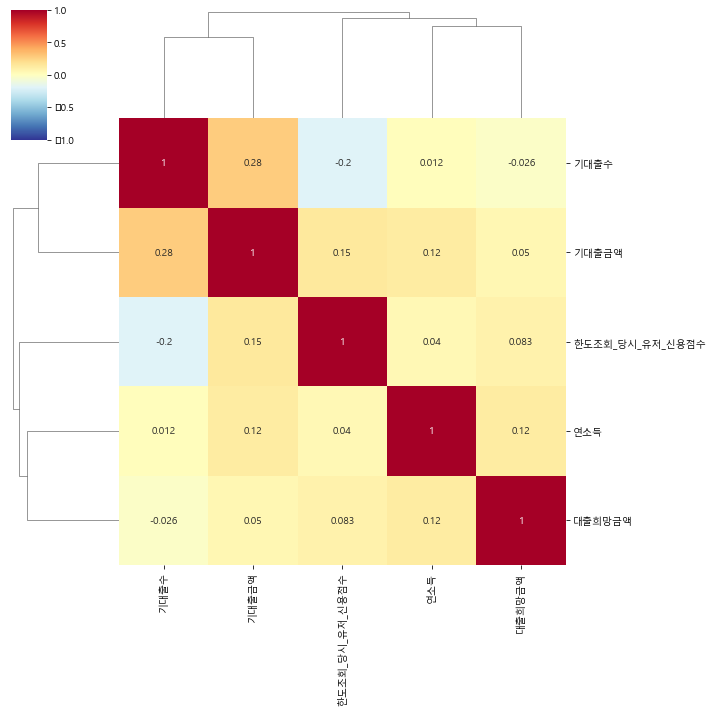

In [68]:
corr = user_df_isin_loan_numeric.corr()

sns.clustermap(corr, 
               annot = True,      # 실제 값 화면에 나타내기
               cmap = 'RdYlBu_r',  # Red, Yellow, Blue 색상으로 표시
               vmin = -1, vmax = 1, #컬러차트 -1 ~ 1 범위로 표시
              )

##### logical missing value 파악
- 존재하지 않음

In [43]:
for col in ["한도조회_당시_유저_신용점수","연소득","대출희망금액","기대출수","기대출금액"]:
    print("\n\n--------",col,"--------")
    print(user_df_isin_loan[col].describe())



-------- 한도조회_당시_유저_신용점수 --------
count    886984.000000
mean        674.251610
std         114.210401
min          60.000000
25%         600.000000
50%         650.000000
75%         730.000000
max        1000.000000
Name: 한도조회_당시_유저_신용점수, dtype: float64


-------- 연소득 --------
count    9.687520e+05
mean     4.486009e+07
std      1.271479e+08
min      0.000000e+00
25%      2.600000e+07
50%      3.500000e+07
75%      5.000000e+07
max      1.000000e+10
Name: 연소득, dtype: float64


-------- 대출희망금액 --------
count    9.687530e+05
mean     3.579240e+07
std      1.980102e+08
min      0.000000e+00
25%      7.000000e+06
50%      2.000000e+07
75%      3.000000e+07
max      1.000000e+10
Name: 대출희망금액, dtype: float64


-------- 기대출수 --------
count    822463.000000
mean          4.500601
std           4.015041
min           1.000000
25%           2.000000
50%           4.000000
75%           6.000000
max         229.000000
Name: 기대출수, dtype: float64


-------- 기대출금액 --------
count    7.437070e+05


##### Numerical Feature 들의 분포를 알아보기 위해 따로 뽑아내고 Histogram 을 그려보기

In [53]:
def plotHistogram(df, columns):
    for col in columns:
        df.describe()
        fig=plt.figure(figsize=(5,2))
        fig.patch.set_facecolor('xkcd:white')
        plt.title(col)
        df.loc[:,col].hist(bins=100)
        print("skew 값 : ",df[col].skew())
    plt.show()
    
def plotPairplot(df, columns):
    sns.pairplot(df.loc[:,columns])
    plt.show()

##### log 변환이전

skew 값 :  0.7797100716775885
skew 값 :  48.38375919596698
skew 값 :  36.24031294806979
skew 값 :  7.08108119764491
skew 값 :  6.464350307266568


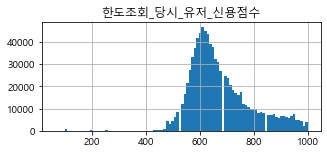

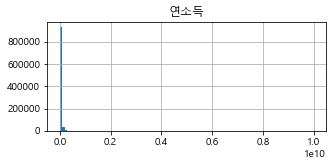

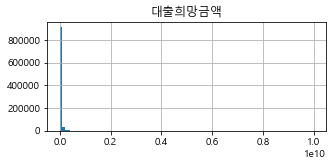

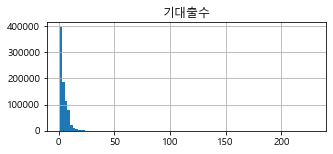

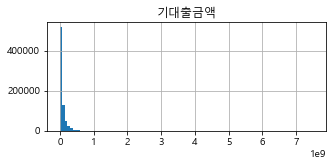

In [50]:
plotHistogram(user_df_isin_loan_numeric,["한도조회_당시_유저_신용점수","연소득","대출희망금액","기대출수","기대출금액"])

In [51]:
# 로그변환
for col in ["연소득","대출희망금액","기대출금액"]:
    user_df_isin_loan_numeric[col] = np.log1p(user_df_isin_loan_numeric[col])

skew 값 :  0.7797100716775885
skew 값 :  -7.7618629054665655
skew 값 :  -3.671864009166869
skew 값 :  7.08108119764491
skew 값 :  -5.853240532306298


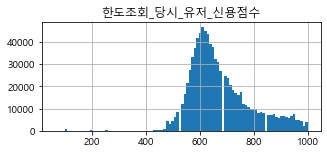

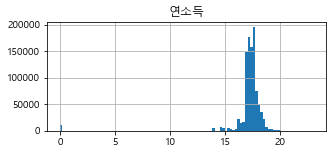

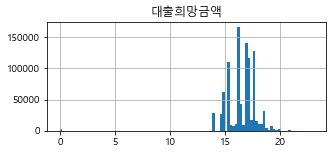

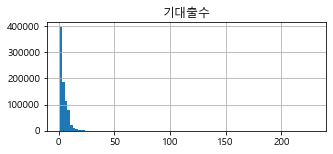

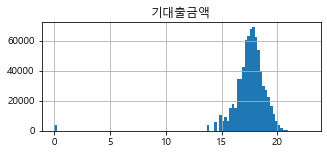

In [52]:
plotHistogram(user_df_isin_loan_numeric,["한도조회_당시_유저_신용점수","연소득","대출희망금액","기대출수","기대출금액"])

In [69]:
Numeric_features = ["한도조회_당시_유저_신용점수","연소득","대출희망금액","기대출수","기대출금액"]

Categoric_features = ["유저_성별","근로형태","고용형태","주거소유형태","대출_목적",'개인회생자_여부','개인회생자_납입_완료_여부']

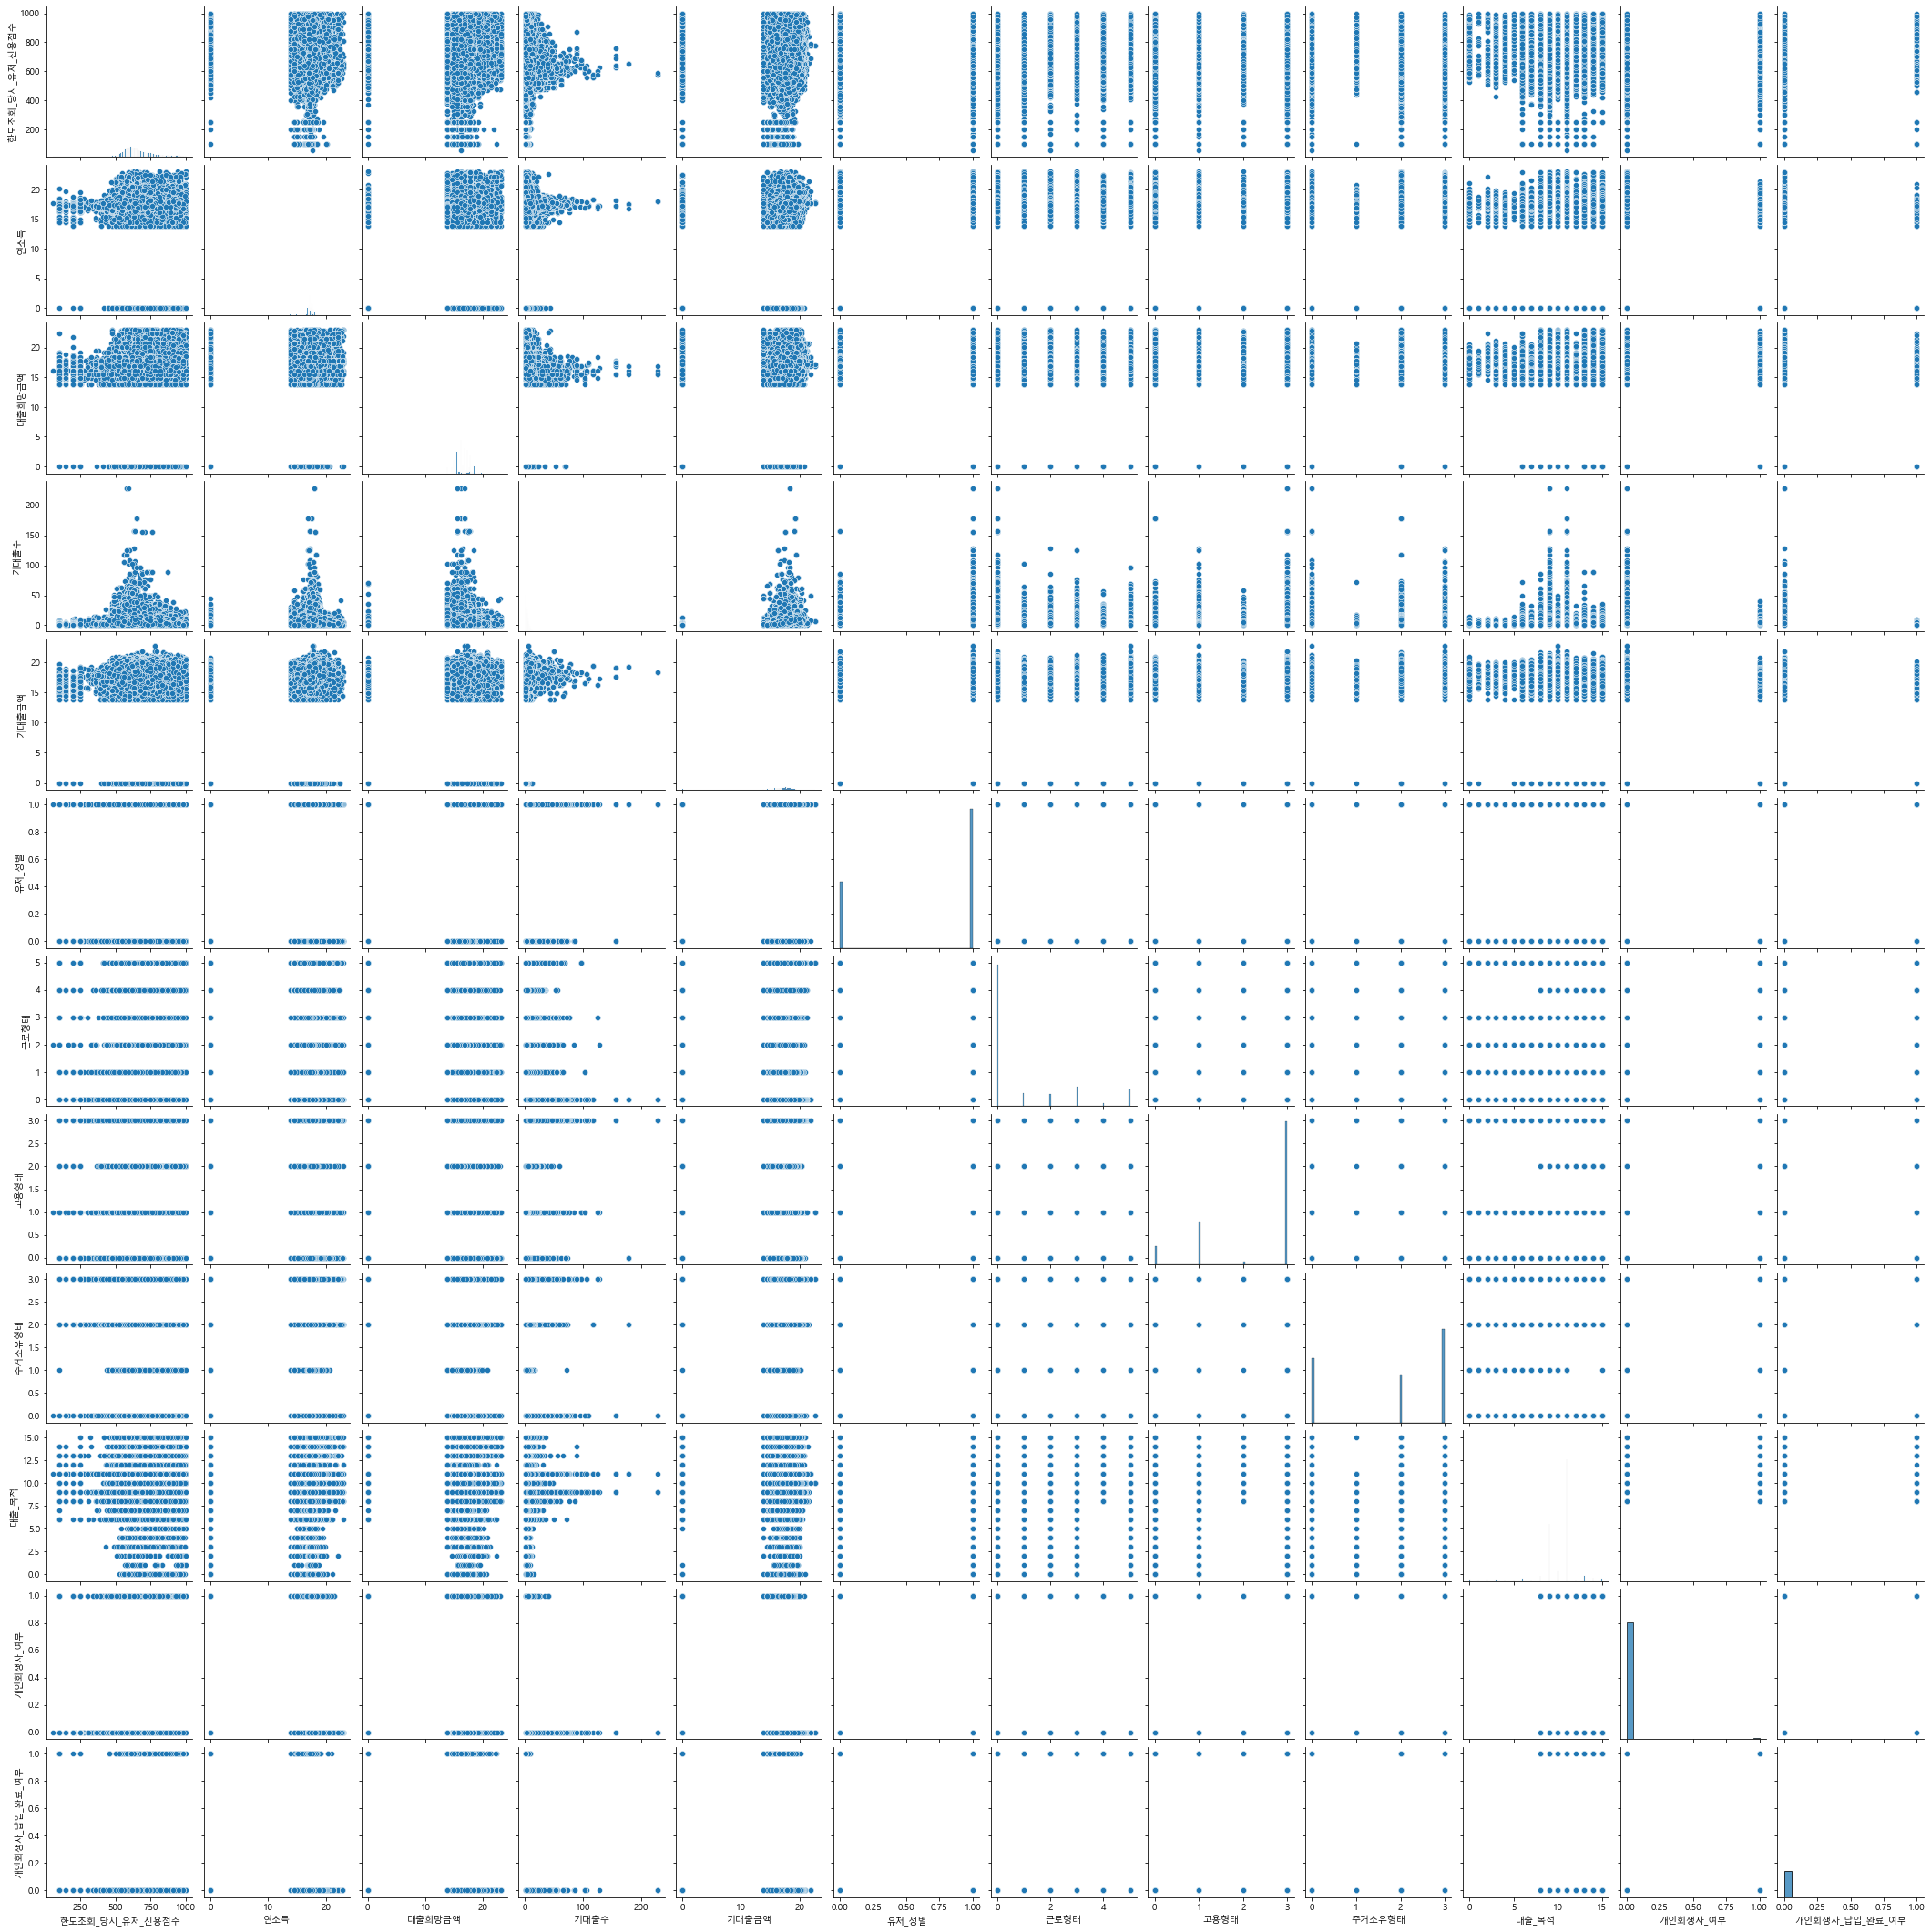

In [70]:
# 로그변환
for col in ["연소득","대출희망금액","기대출금액"]:
    user_df_isin_loan_encode[col] = np.log1p(user_df_isin_loan_encode[col])

plotPairplot(user_df_isin_loan_encode,Numeric_features+Categoric_features)

In [112]:
# 로그변환한 데이터로 확인하기

user_df_isin_loan_log = user_df_isin_loan.copy()

for col in ["연소득","대출희망금액","기대출금액"]:
    user_df_isin_loan_log[col] = np.log1p(user_df_isin_loan_log[col])

In [113]:
user_df_isin_loan_log.head(3)

,신청서_번호,유저_번호,유저_생년월일,유저_성별,생성일시,한도조회_당시_유저_신용점수,연소득,근로형태,입사연월,고용형태,주거소유형태,대출희망금액,대출_목적,개인회생자_여부,개인회생자_납입_완료_여부,기대출수,기대출금액
1,954900,553686,1968.0,1.0,2022-06-07 14:29:03,870.0,17.216708,PRIVATEBUSINESS,20070201.0,정규직,기타가족소유,17.216708,대환대출,0.0,NaN,1.0,17.111347
2,137274,59516,1997.0,1.0,2022-06-07 21:40:22,710.0,17.216708,FREELANCER,20210901.0,기타,기타가족소유,16.118096,생활비,0.0,NaN,5.0,16.523561
3,1570936,167320,1989.0,1.0,2022-06-07 09:40:27,820.0,17.942645,EARNEDINCOME,20170101.0,정규직,자가,14.508658,생활비,0.0,NaN,7.0,19.656152


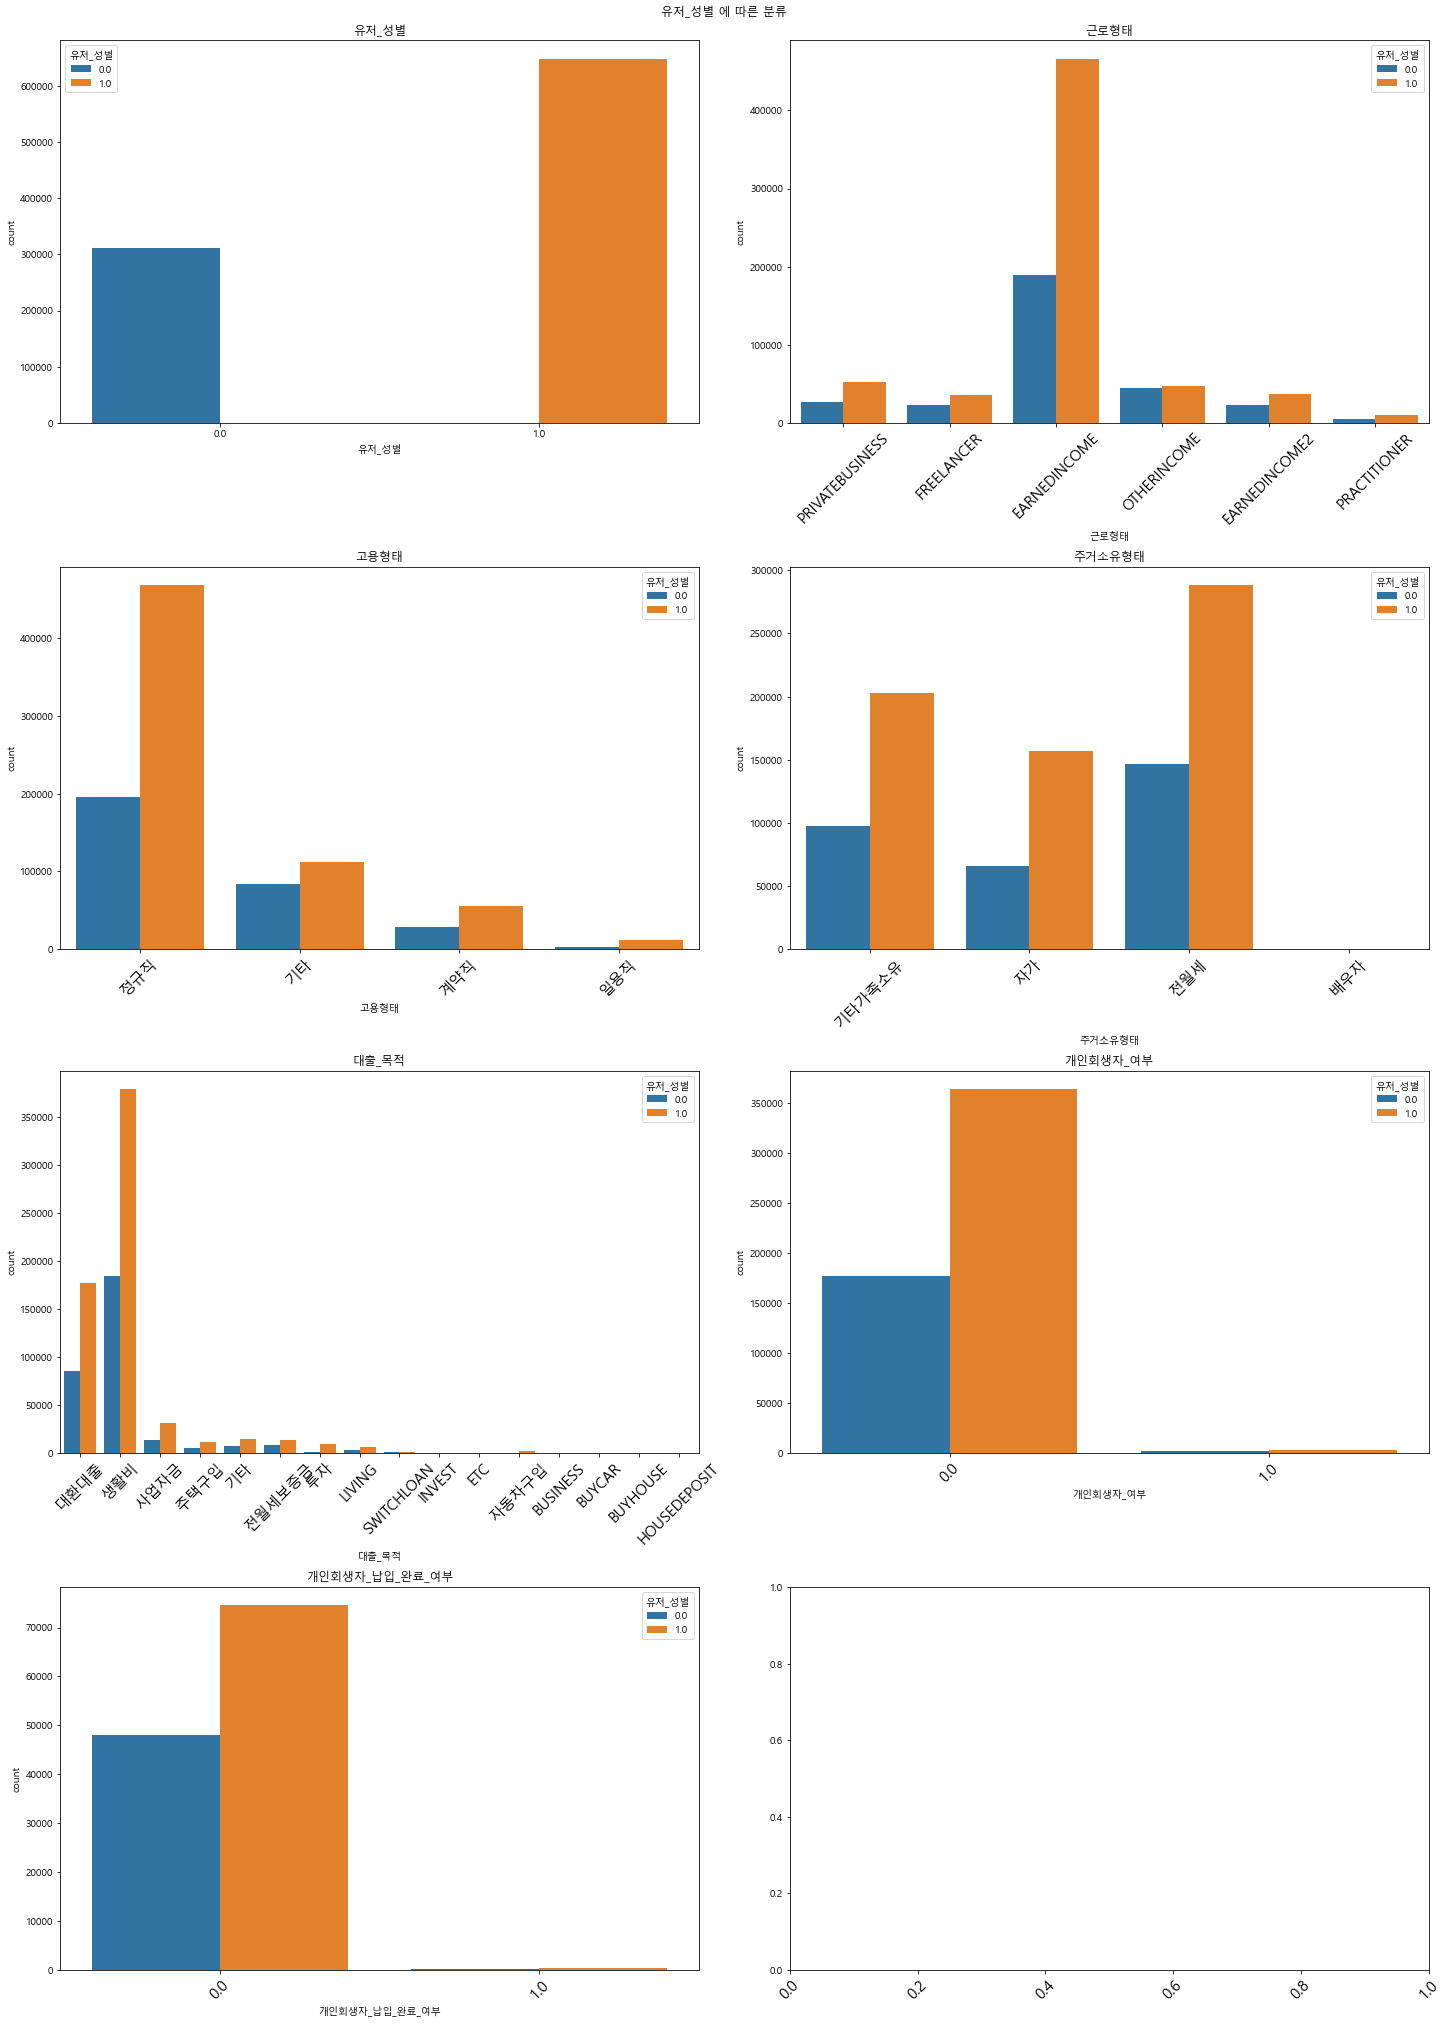

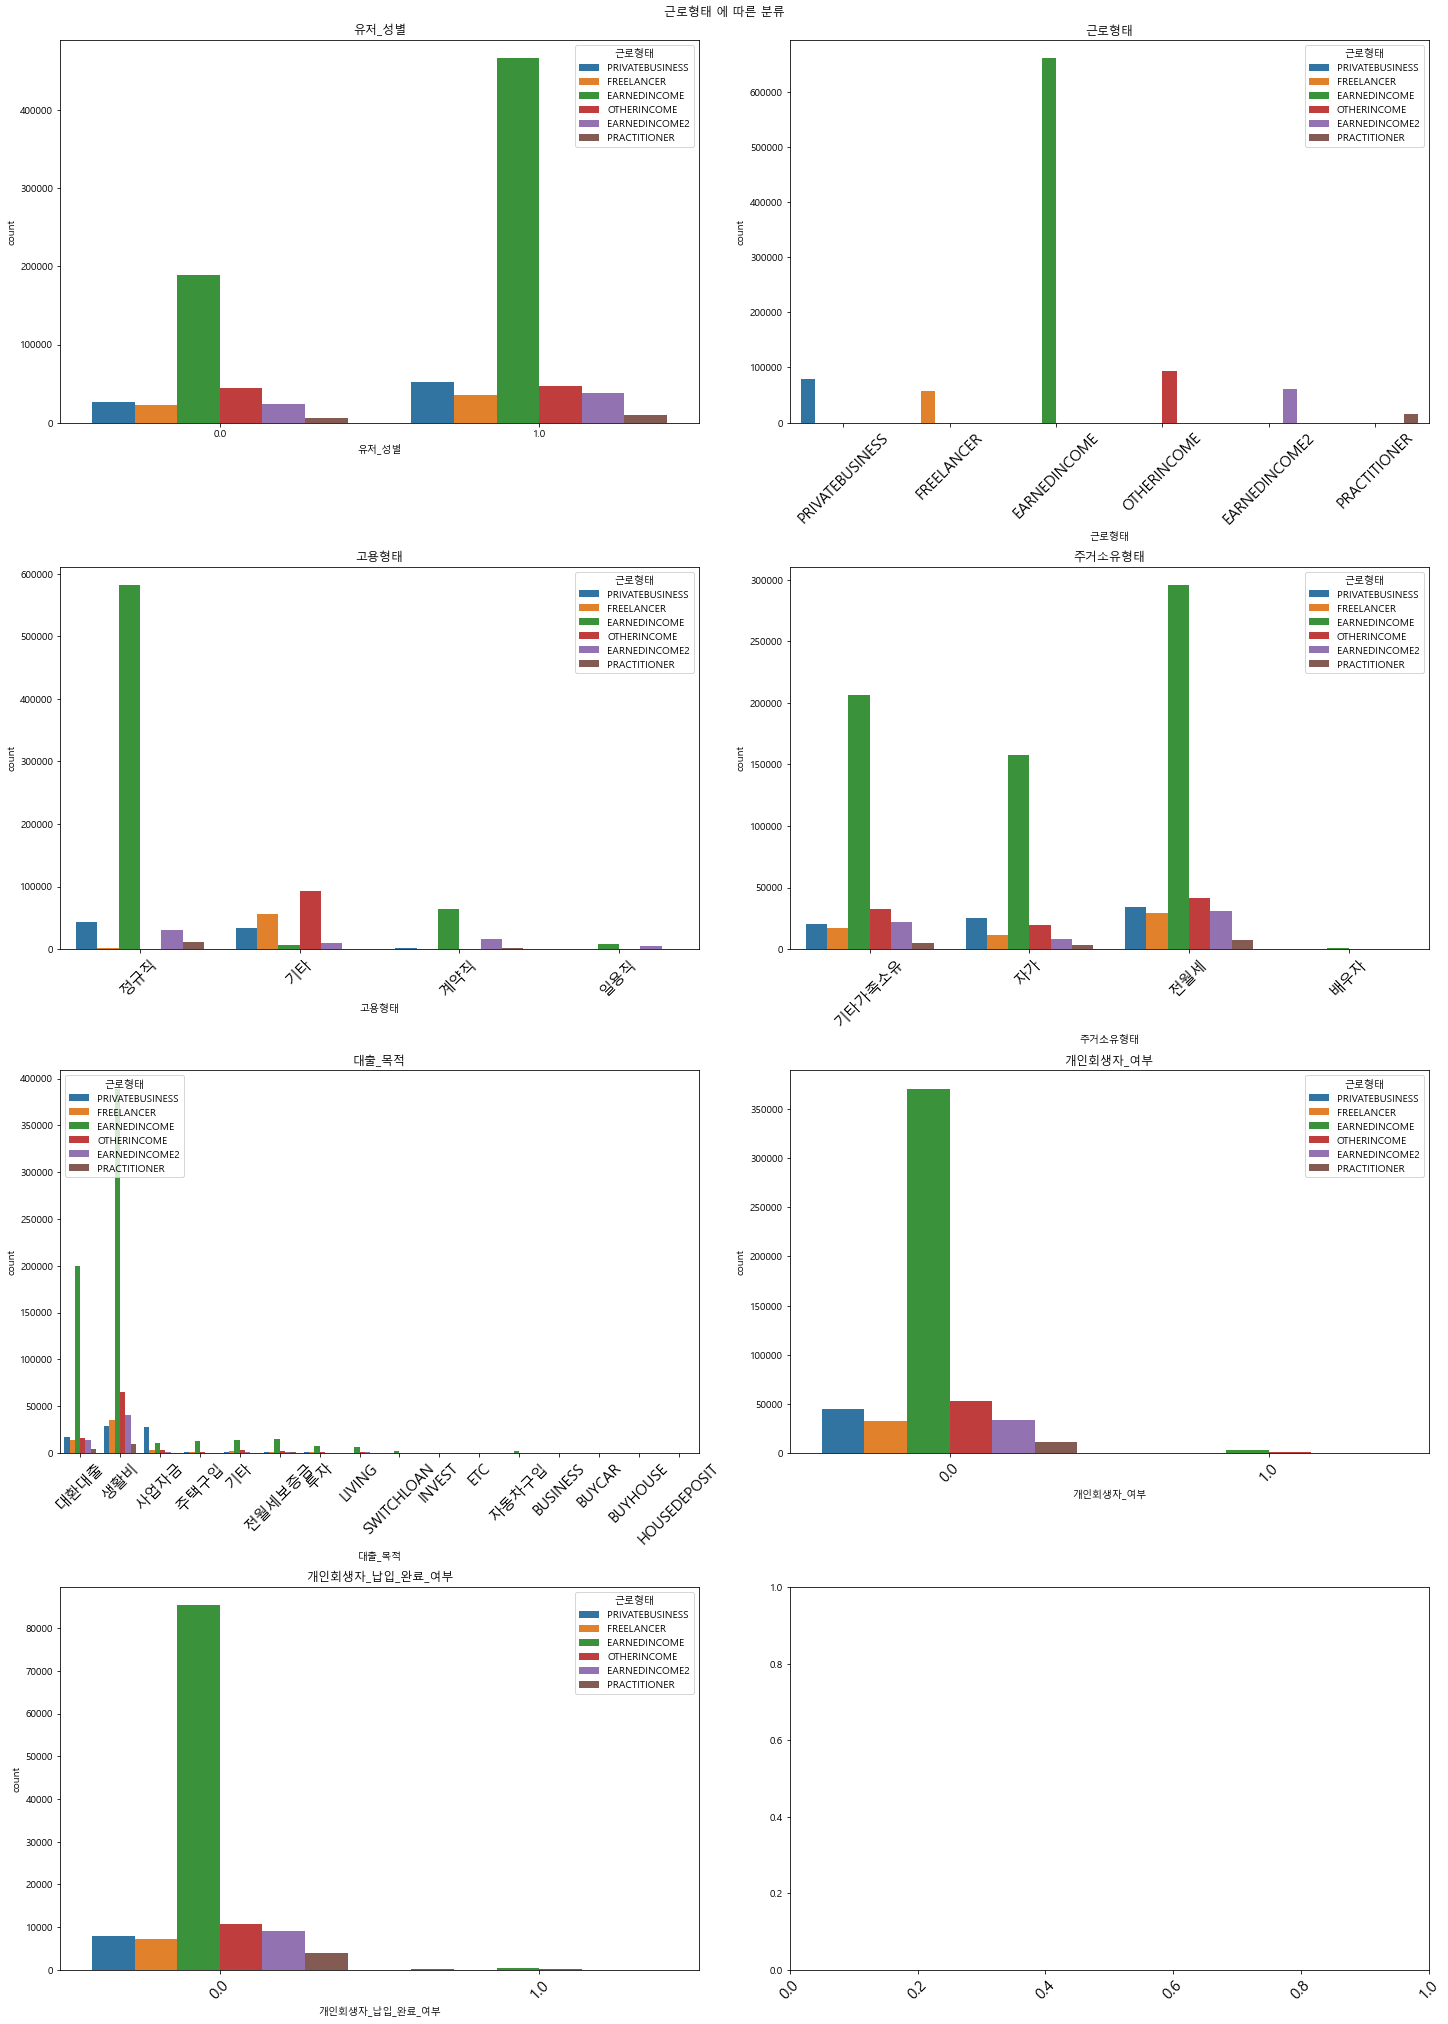

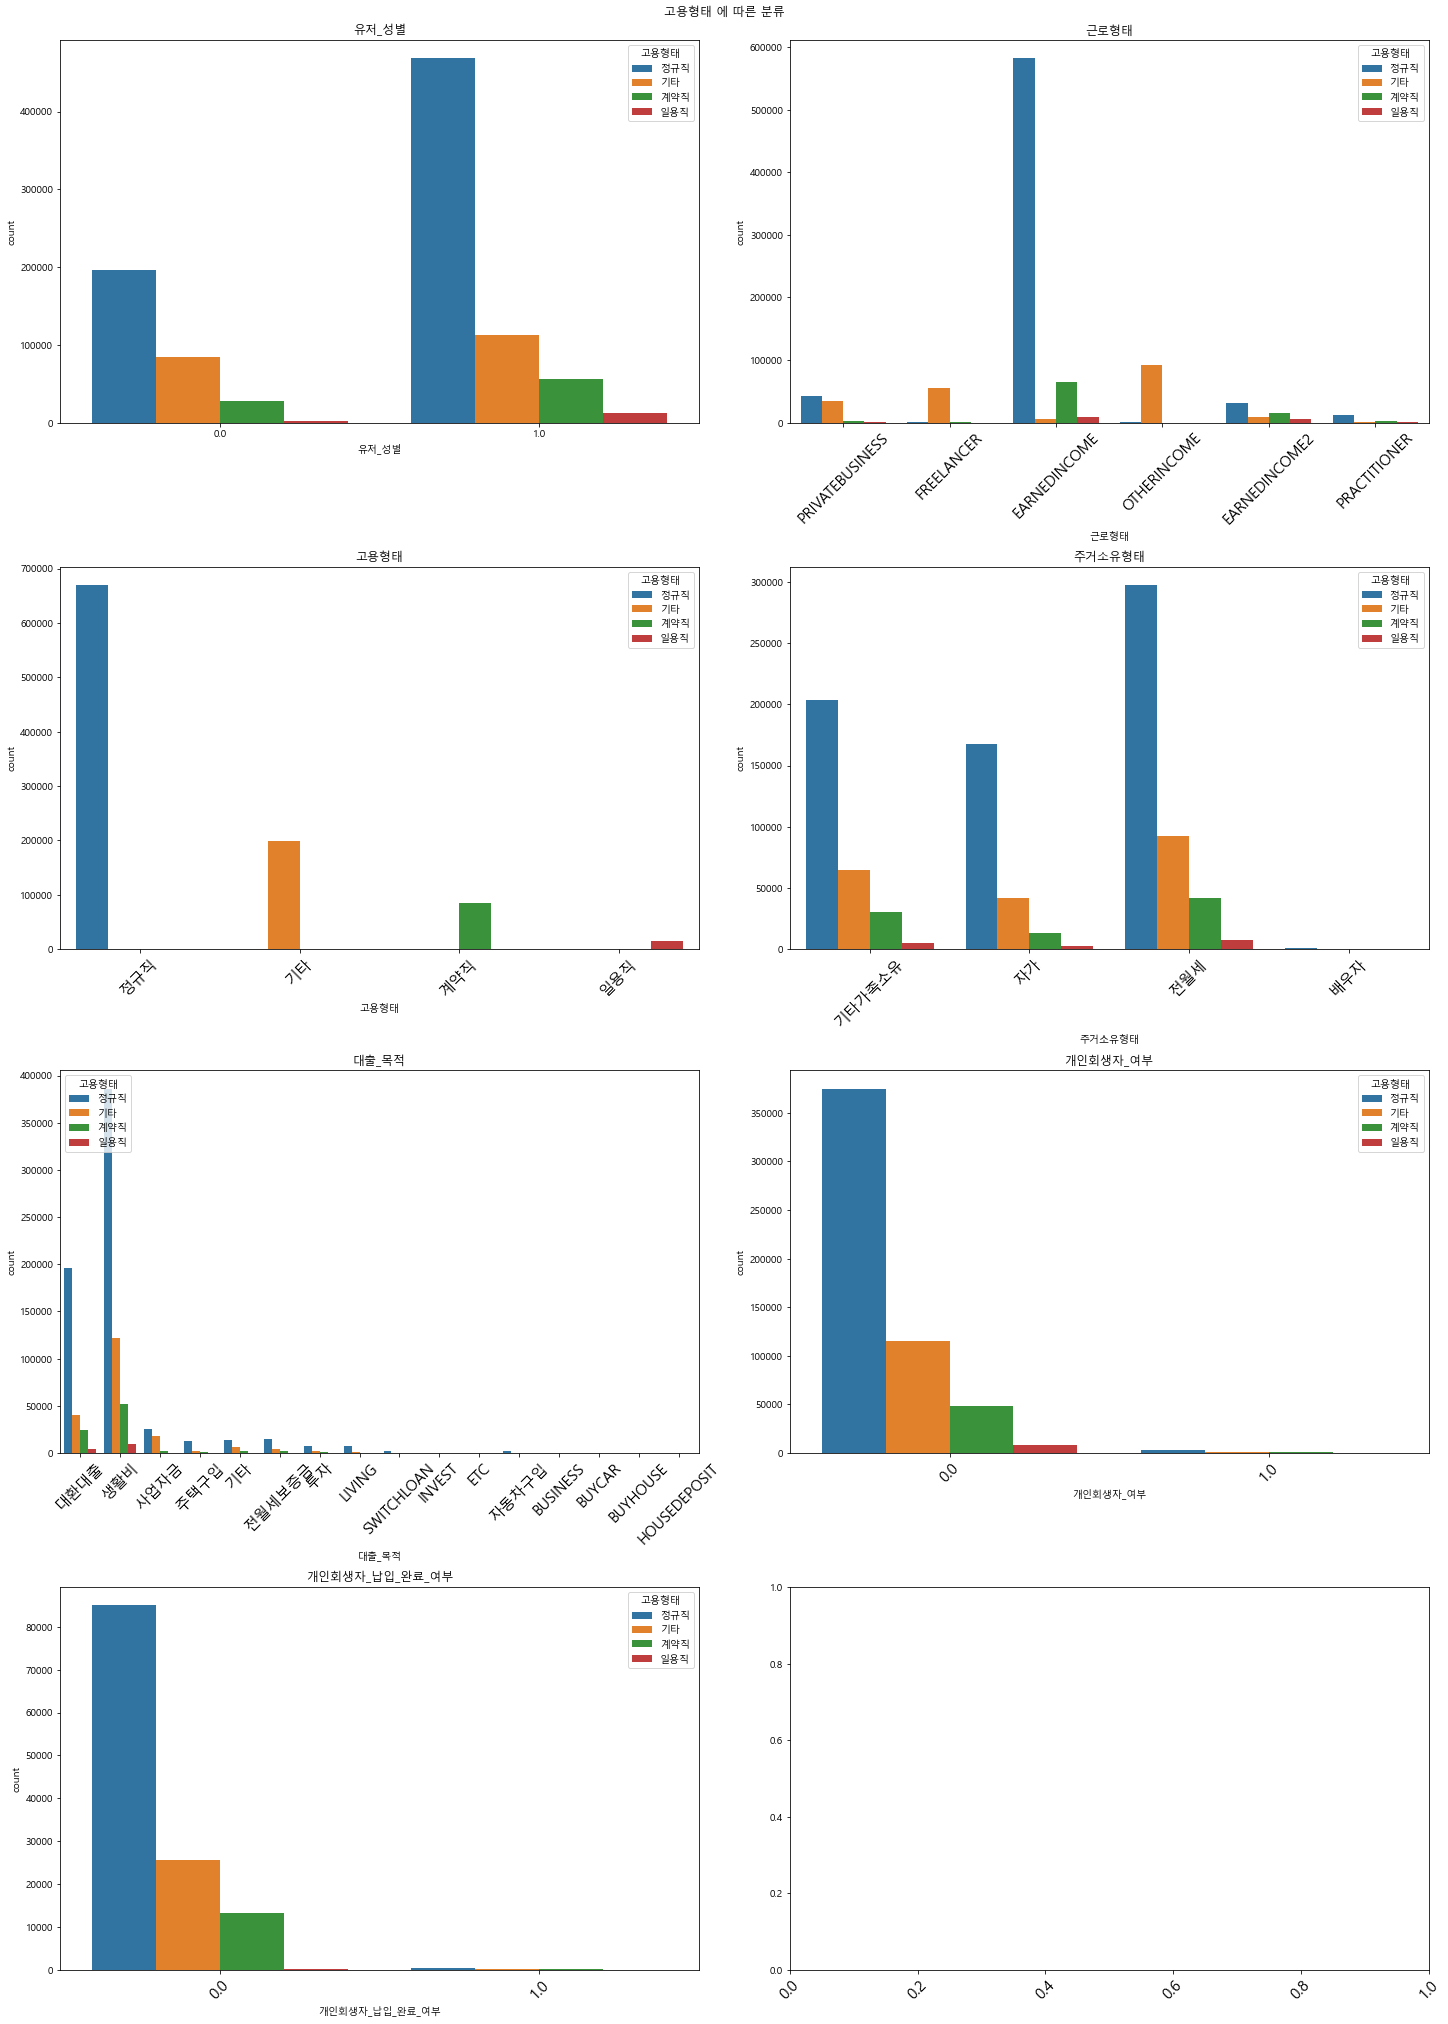

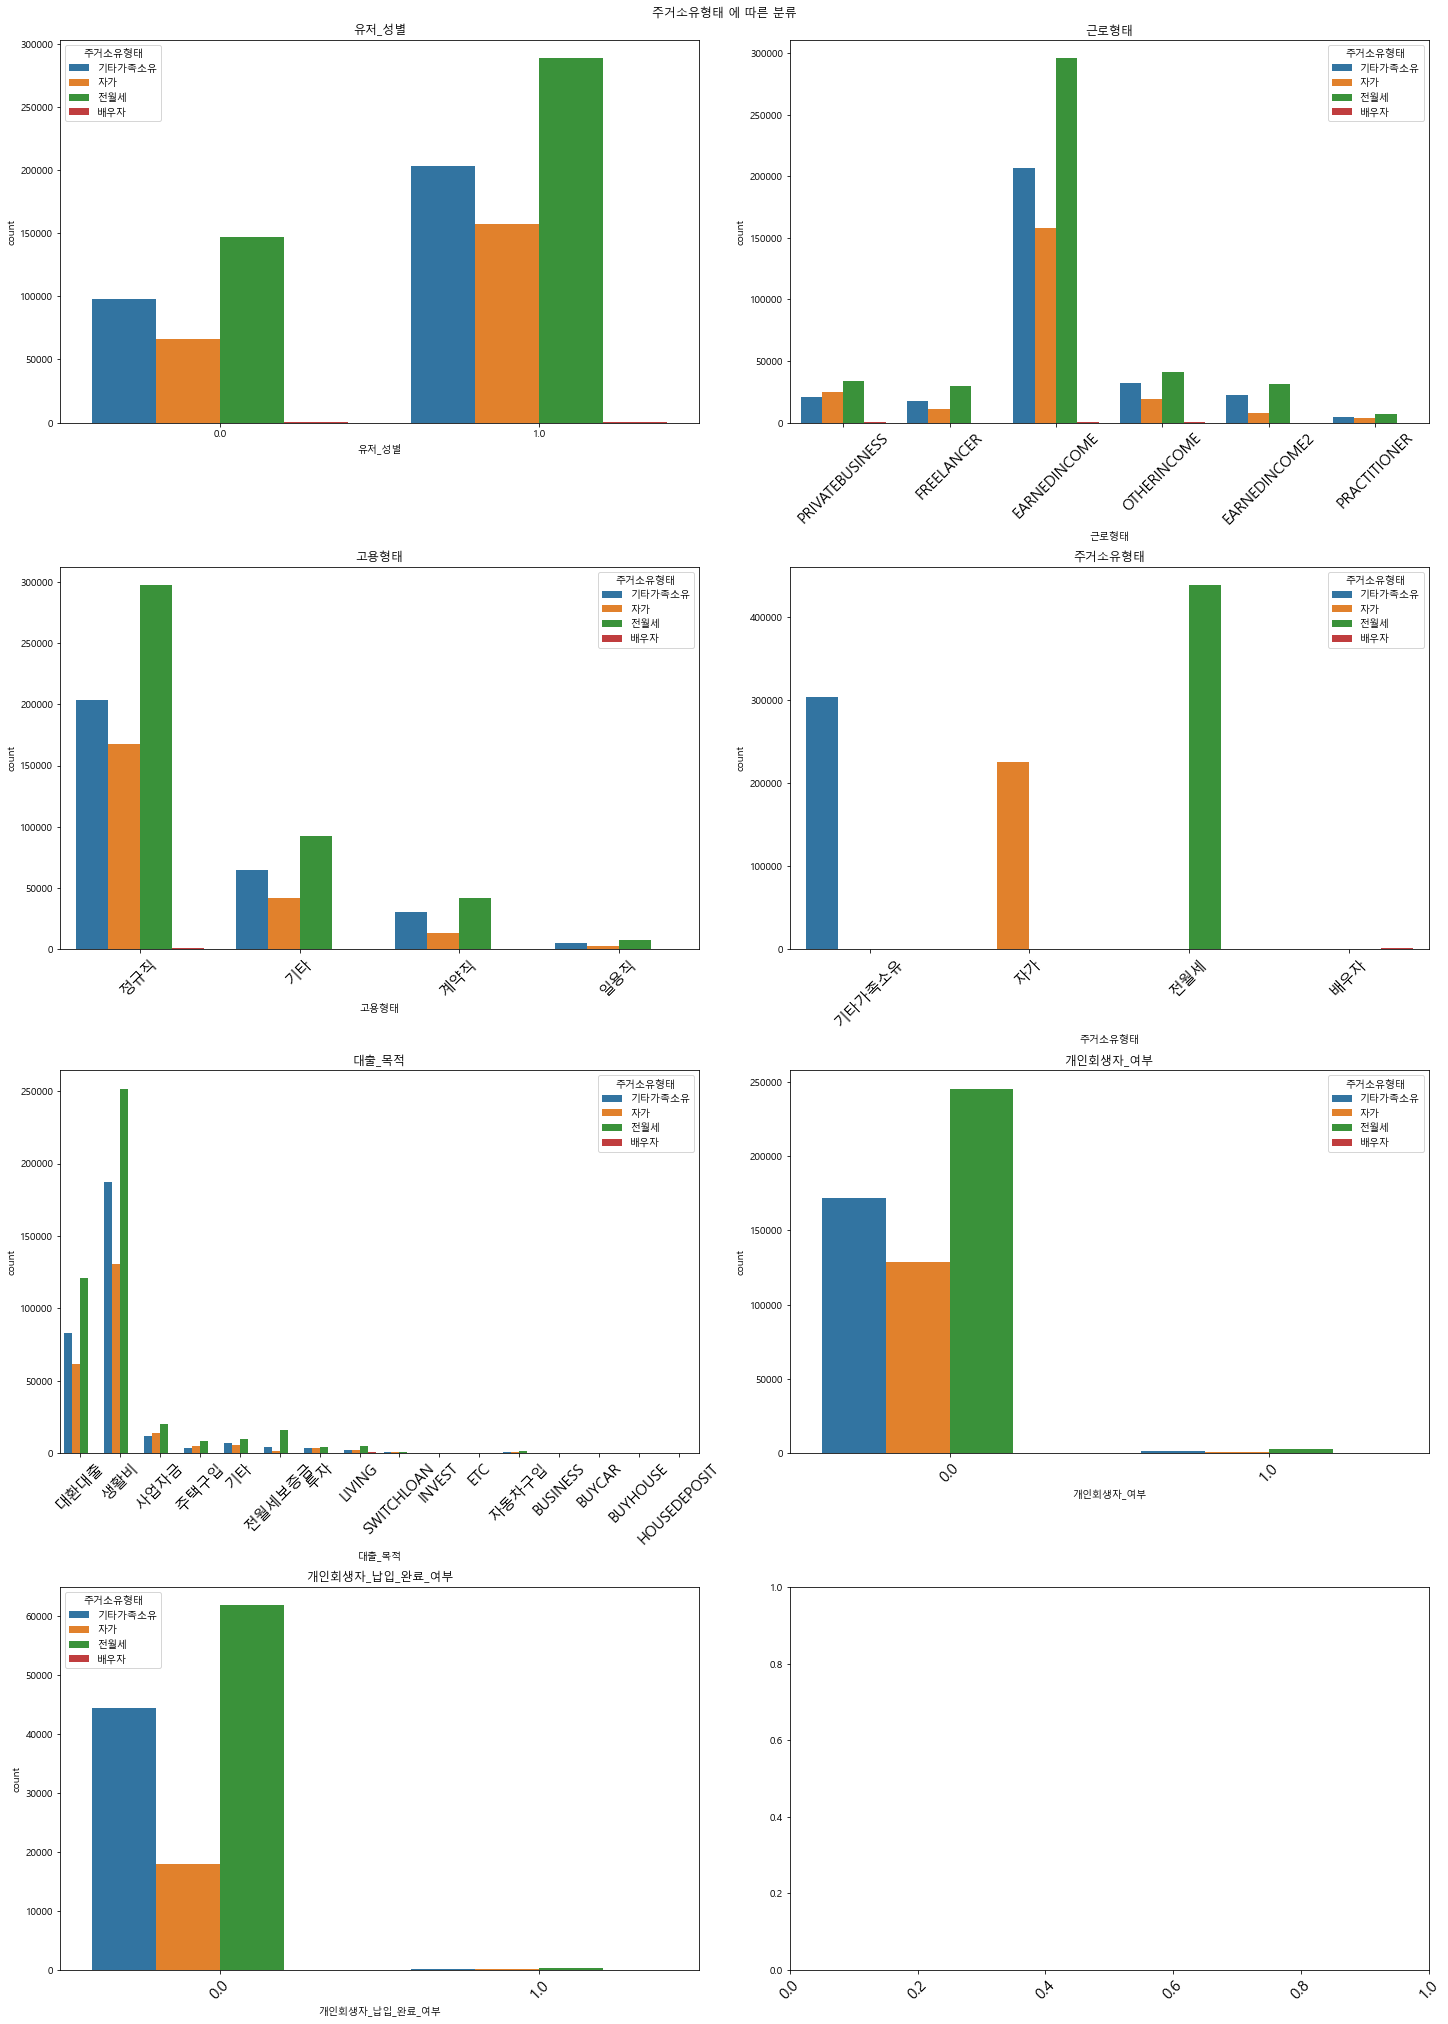

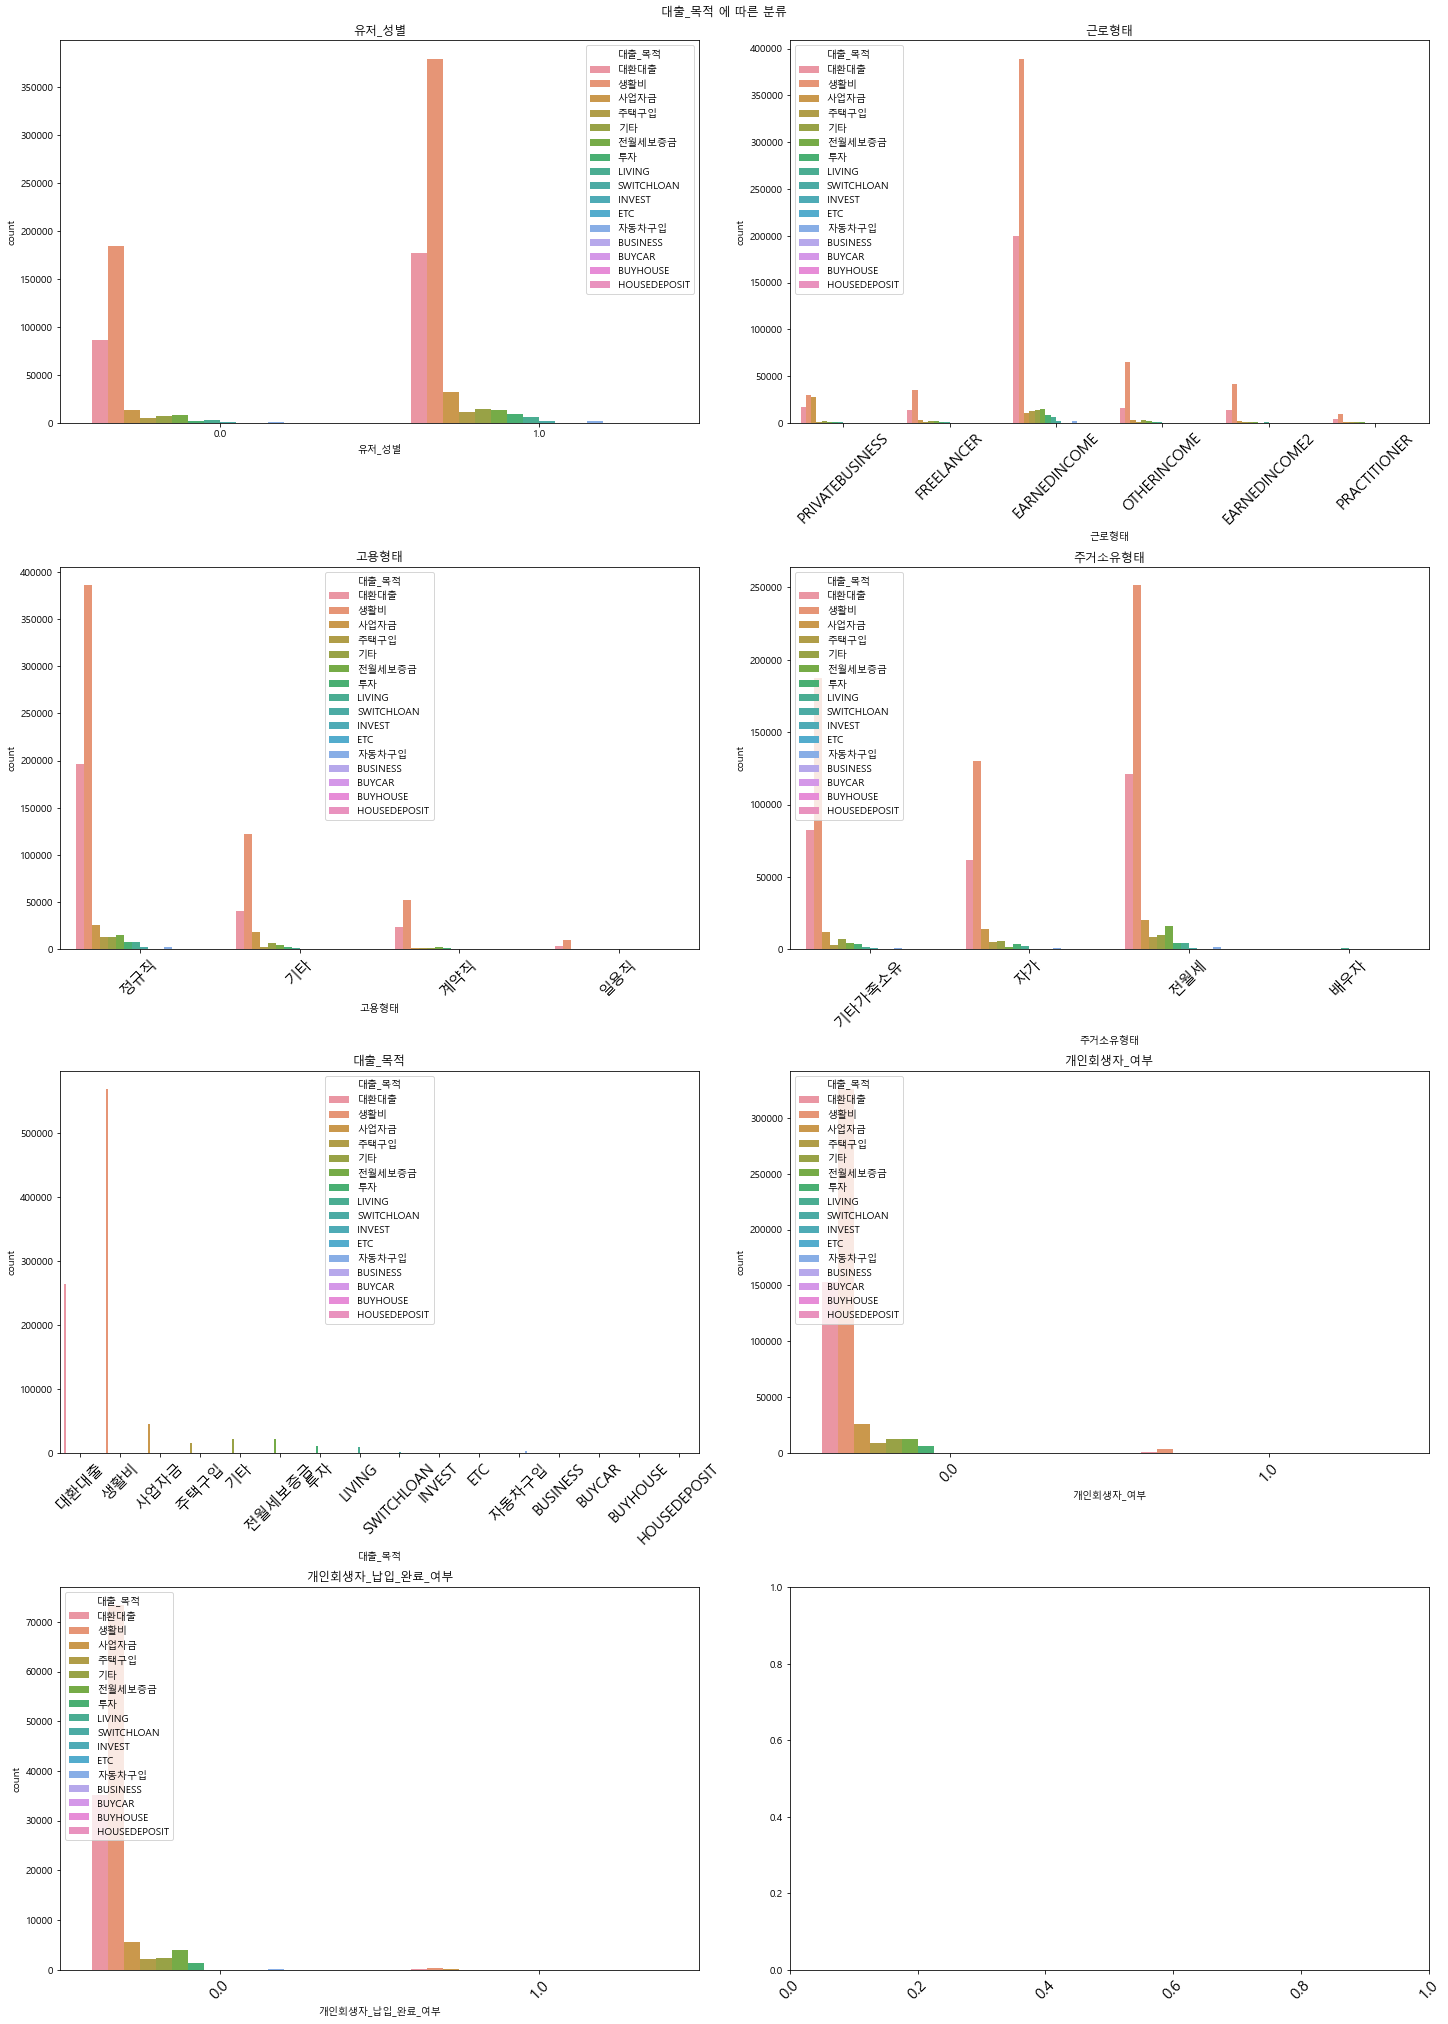

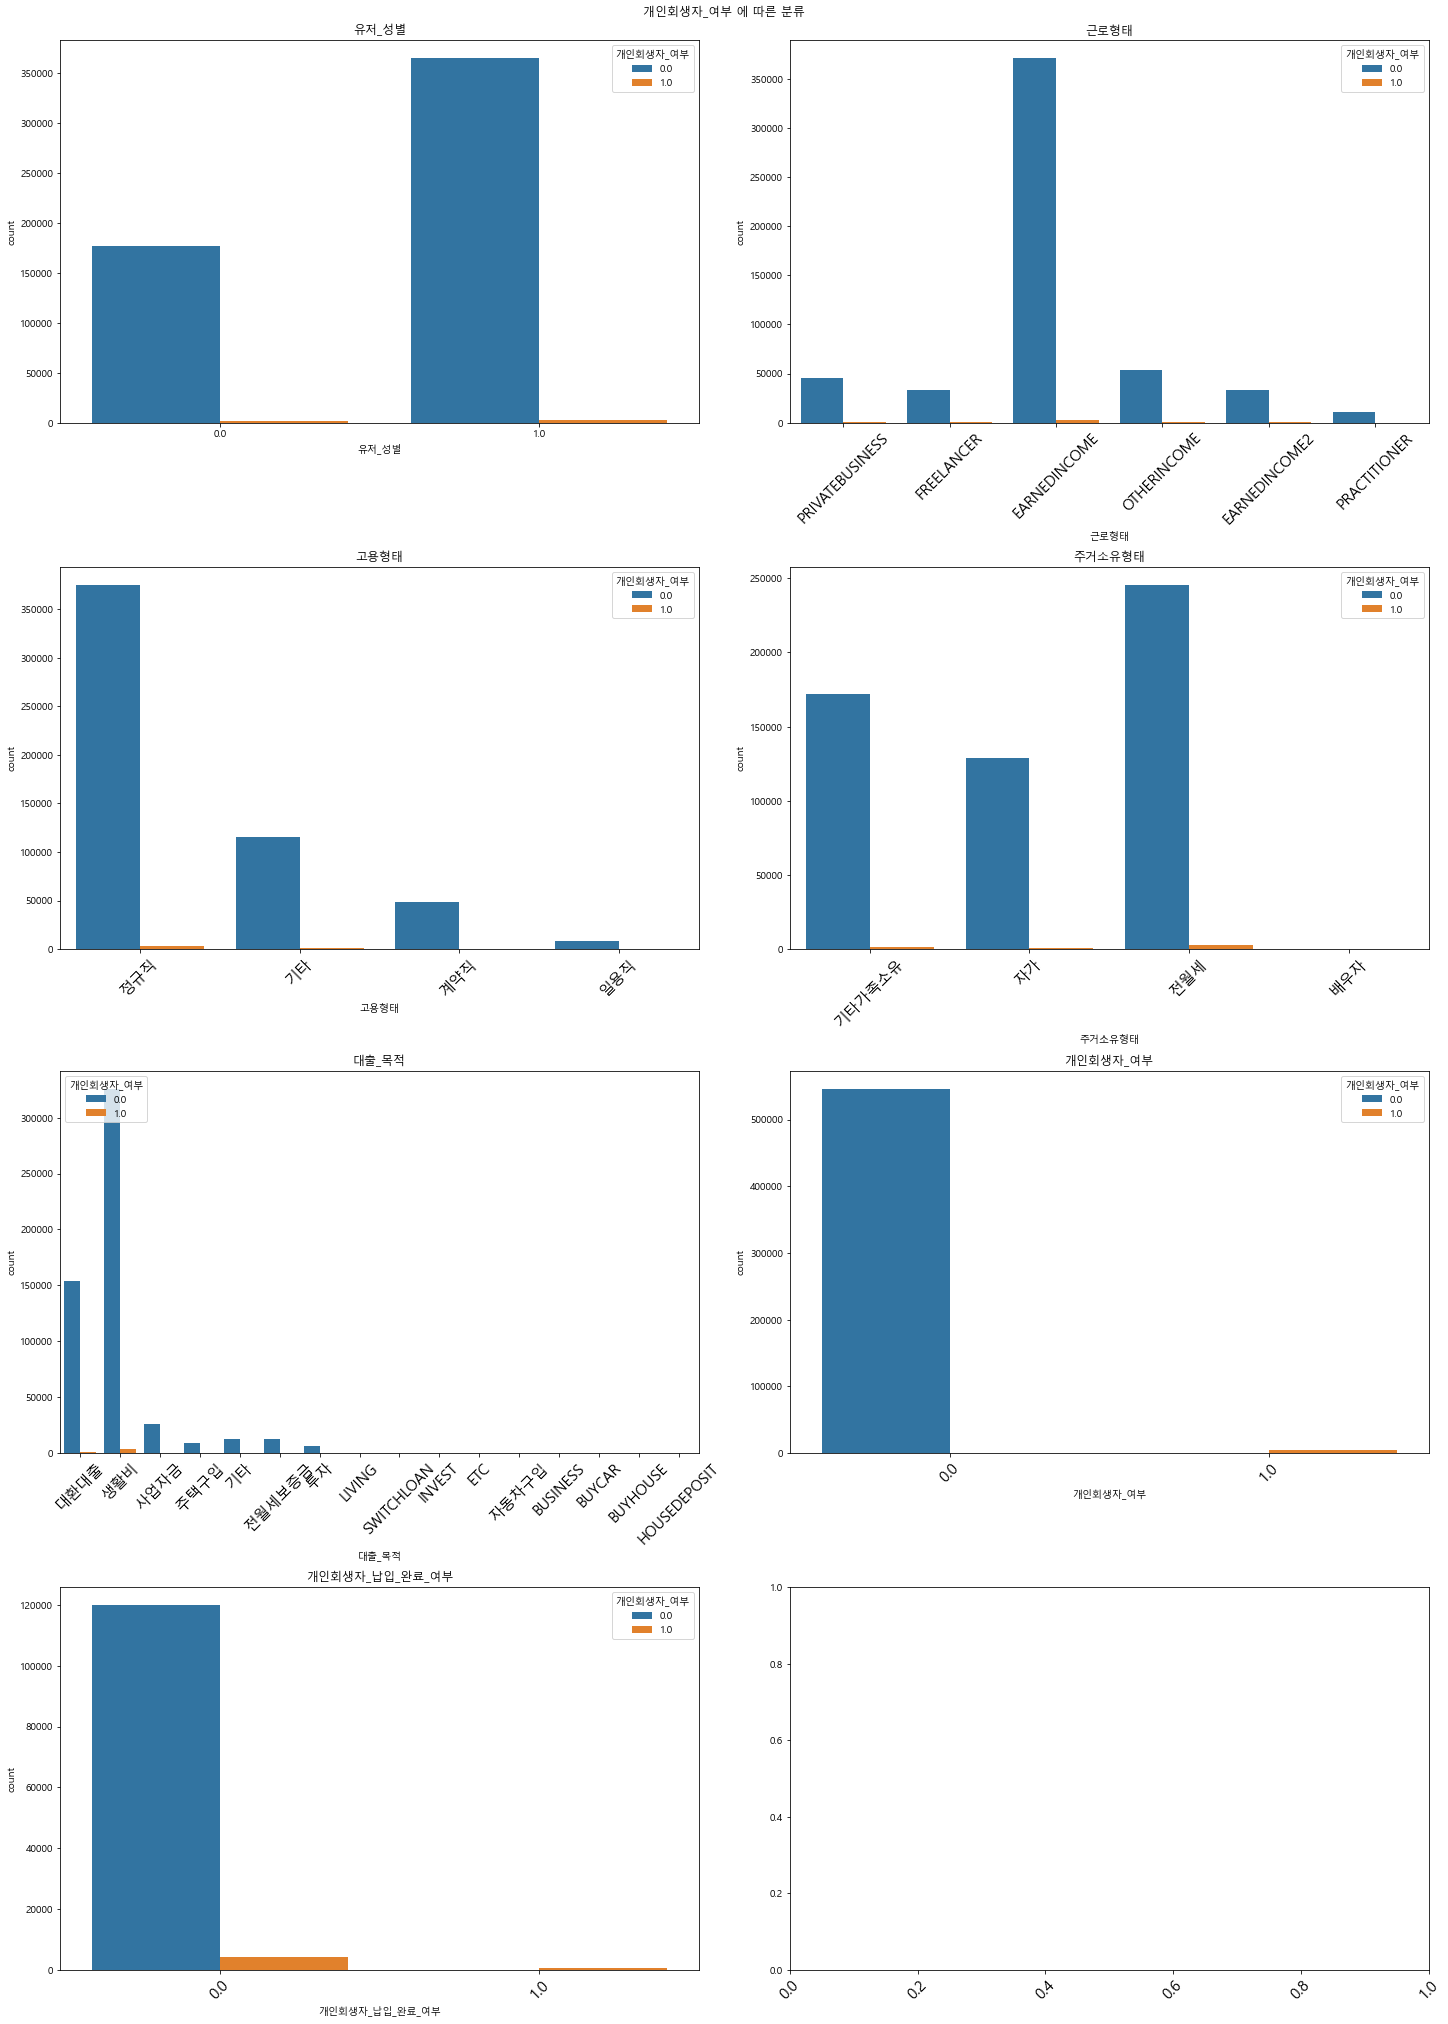

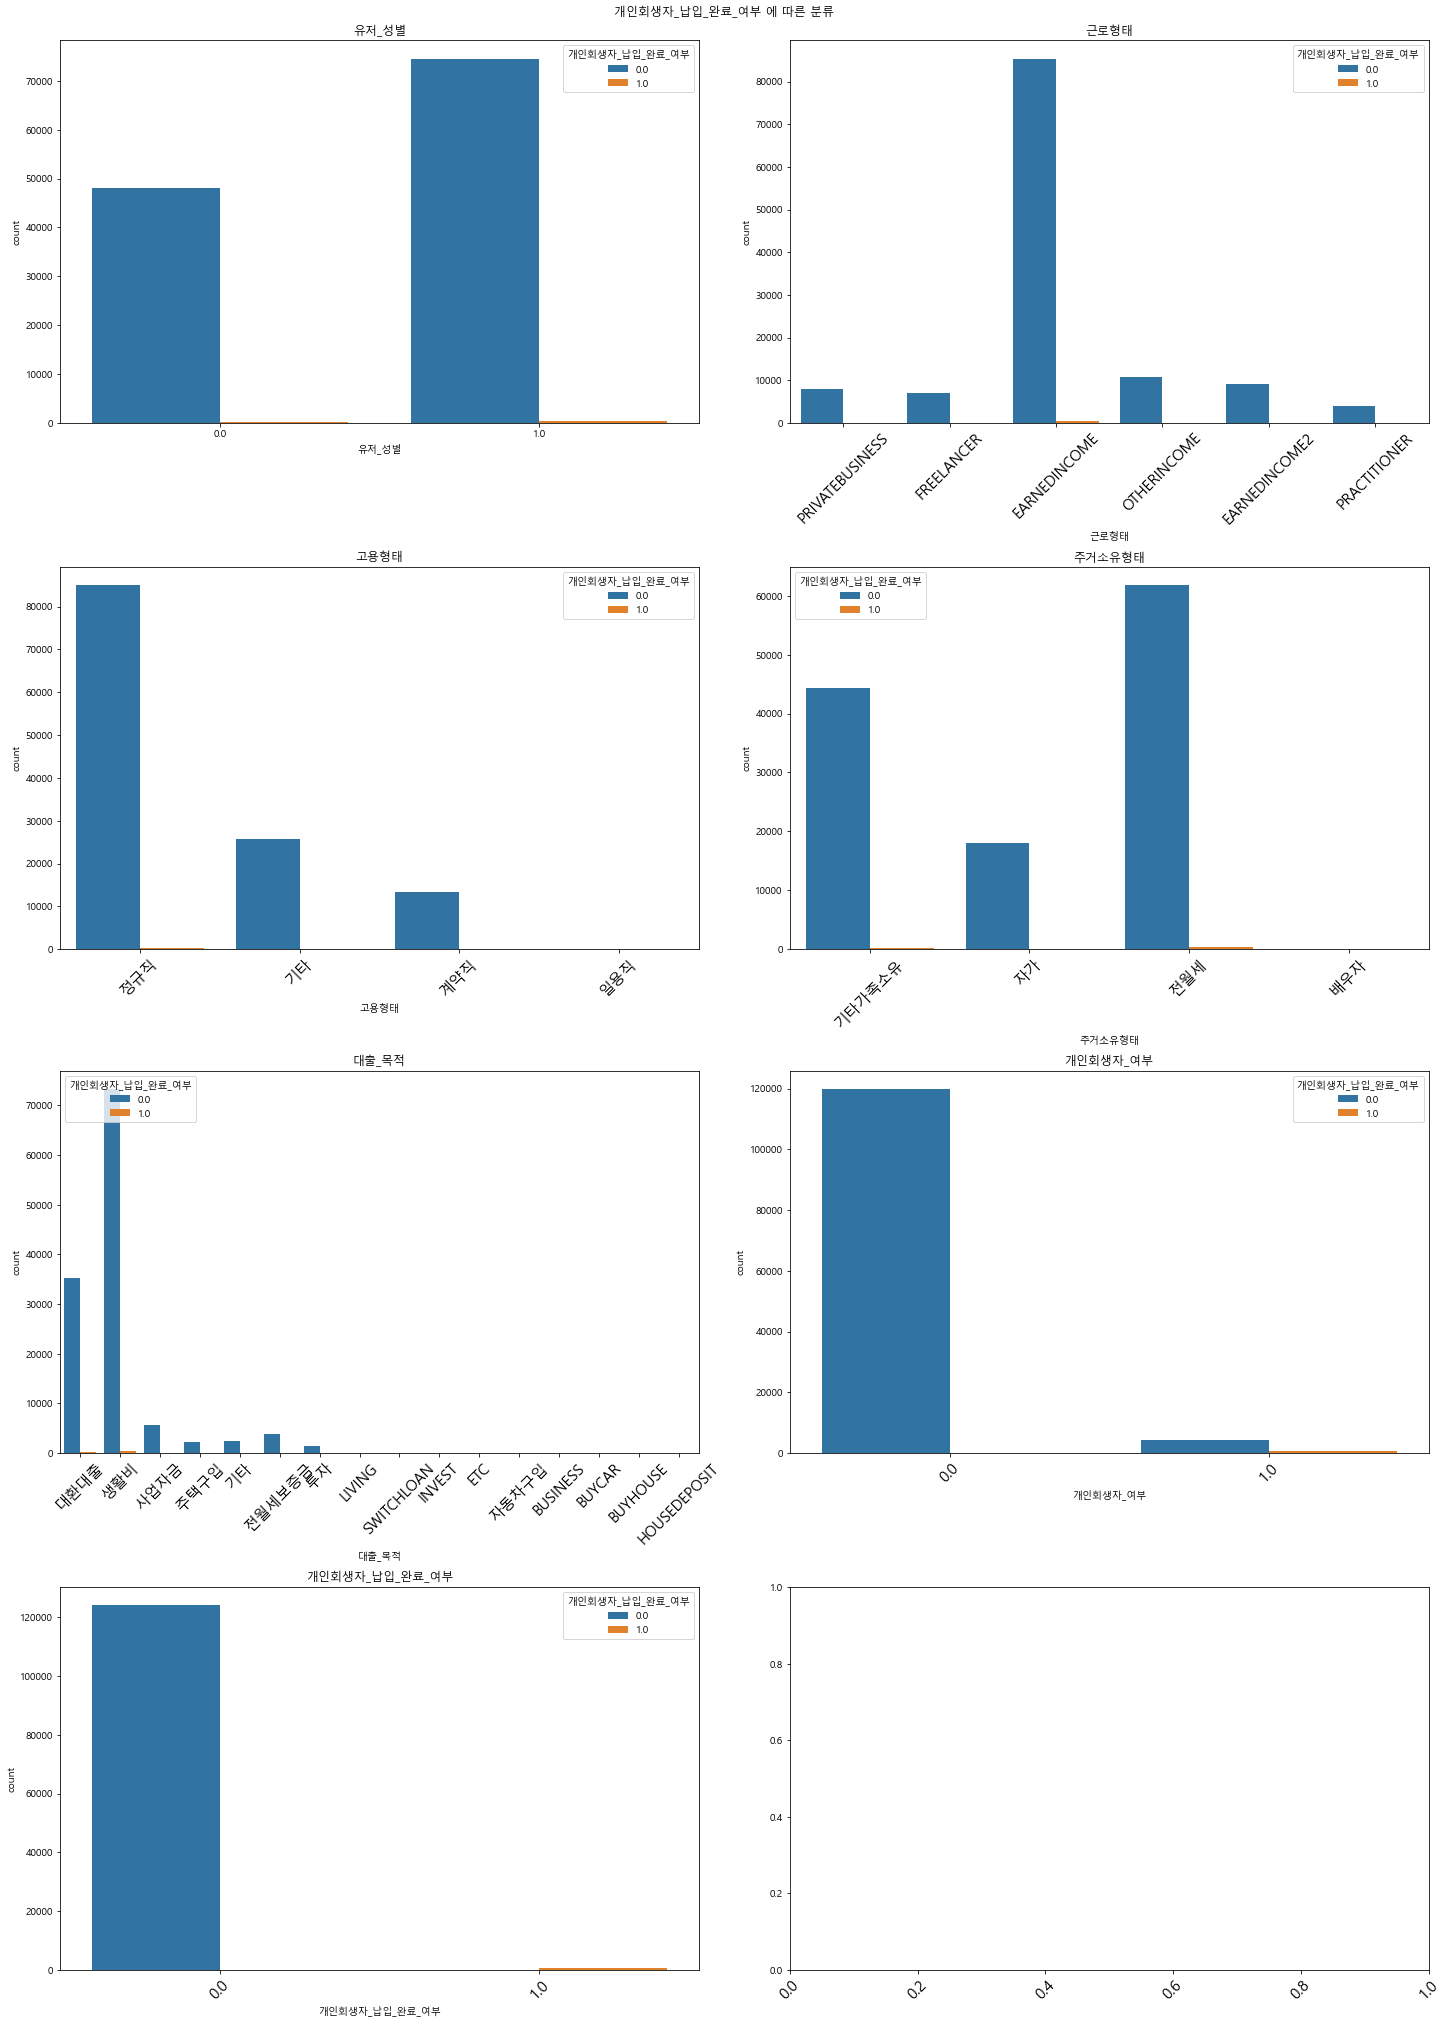

In [115]:
for col in Categoric_features:
    
    fig, ax = plt.subplots(4,2, figsize=(20, 28), constrained_layout=True)
    ax = ax.flatten()
    fig.suptitle(col+' 에 따른 분류')

    count=0
    for cat in Categoric_features:
        sns.countplot(x=cat, data=user_df_isin_loan_log,hue=col, ax=ax[count])
        ax[count].set(title = cat)
        count+=1
        ax[count].tick_params(axis='x', labelsize=15, rotation=45)
        #plt.xticks(rotation=45)

    plt.show()

In [128]:
Categoric_features

['유저_성별', '근로형태', '고용형태', '주거소유형태', '대출_목적', '개인회생자_여부', '개인회생자_납입_완료_여부']

In [129]:
user_df_isin_loan_log["근로형태"].value_counts()

EARNEDINCOME       660900
OTHERINCOME         92895
PRIVATEBUSINESS     79702
EARNEDINCOME2       61364
FREELANCER          58061
PRACTITIONER        15831
Name: 근로형태, dtype: int64

#### Categoric_features와 Continuous 사이의 관계

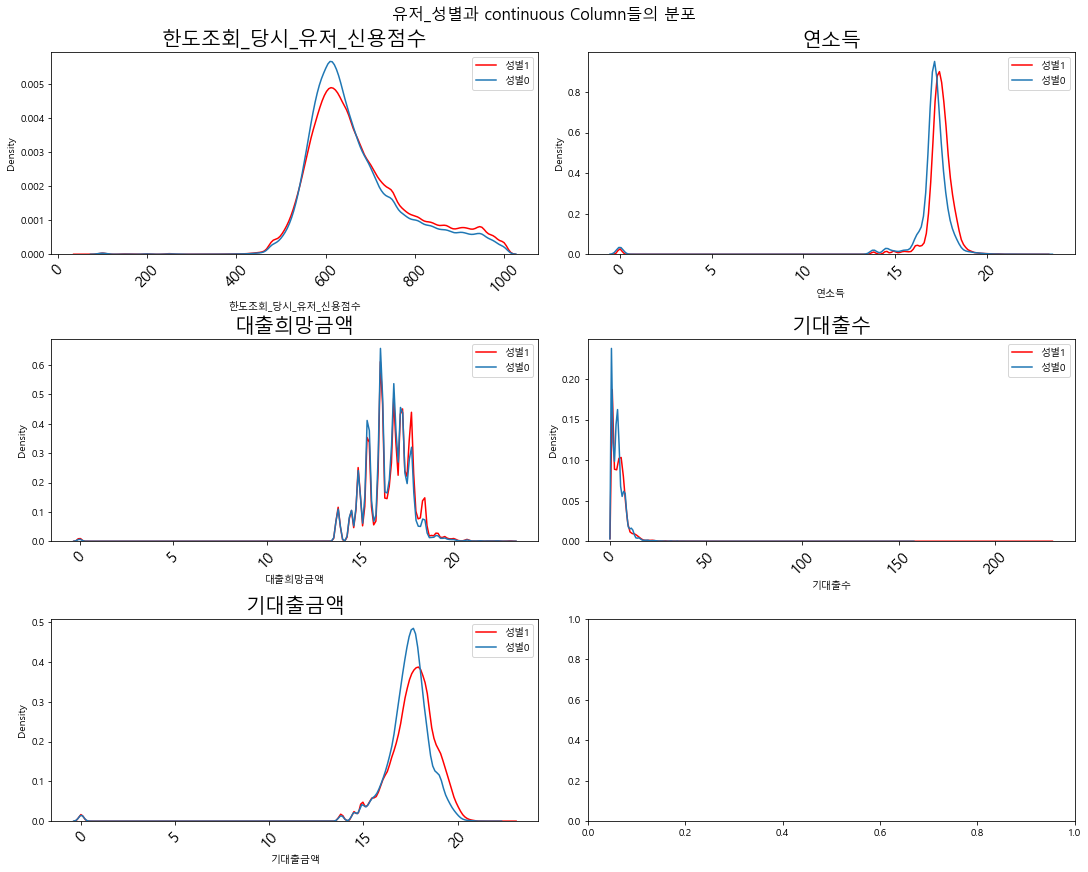

In [127]:
fig,ax = plt.subplots(3,2,figsize=(15,12), constrained_layout=True)
ax = ax.flatten()
fig.suptitle('유저_성별과 continuous Column들의 분포', fontsize=16)

for i in range(len(Numeric_features)):
    sns.distplot(user_df_isin_loan_log[user_df_isin_loan_log['유저_성별'] == 1][Numeric_features[i]], 
                 color='Red', ax=ax[i], hist = False,label= "성별1")
    
    sns.distplot(user_df_isin_loan_log[user_df_isin_loan_log['유저_성별'] == 0][Numeric_features[i]],
                 ax=ax[i],hist = False,label="성별0")
    
    ax[i].set_title(Numeric_features[i],fontsize=20)
    #ax[i].set(title = Numeric_features[i],fontsize=16)
    
    ax[i].tick_params(axis='x', labelsize=15, rotation=45)
    ax[i].legend()
    
plt.show()


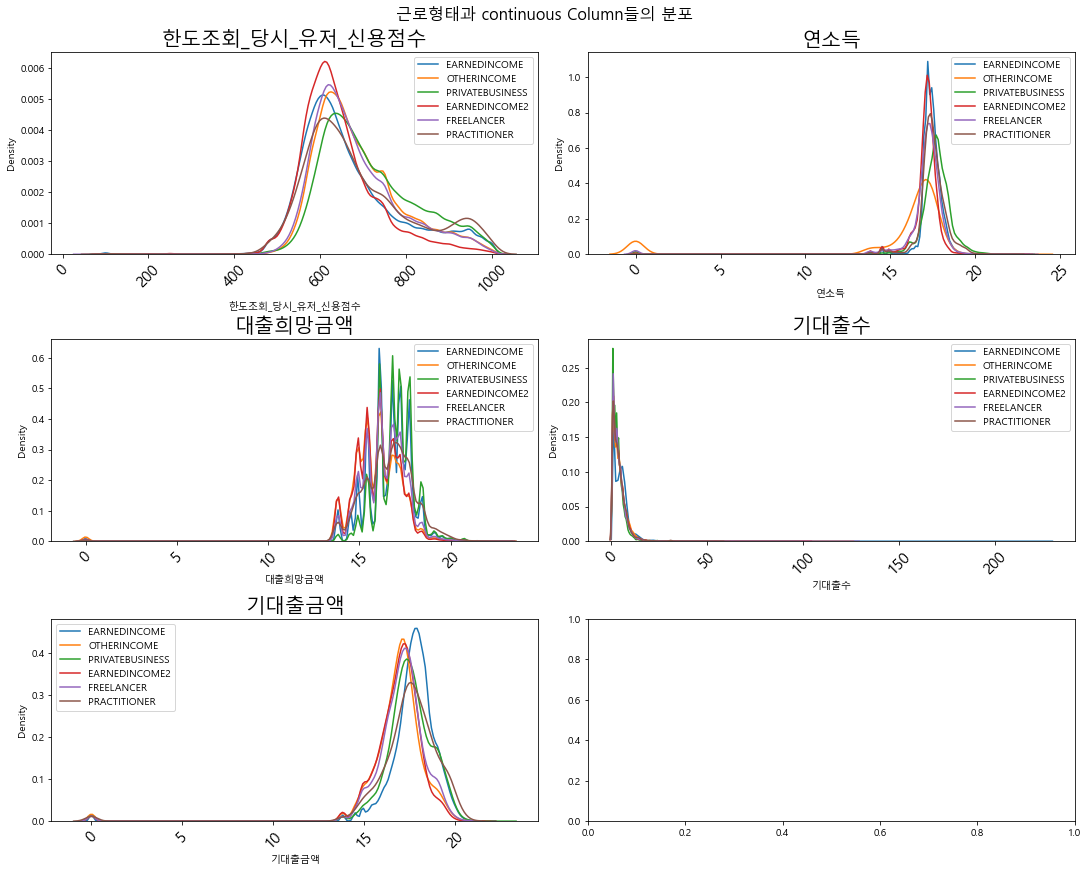

In [132]:
fig,ax = plt.subplots(3,2,figsize=(15,12), constrained_layout=True)
ax = ax.flatten()
col = "근로형태"
fig.suptitle(col+'과 continuous Column들의 분포', fontsize=16)

for i in range(len(Numeric_features)):
    
    for index in user_df_isin_loan_log[col].value_counts().index:
        
        sns.distplot(user_df_isin_loan_log[user_df_isin_loan_log[col] == index][Numeric_features[i]], 
                      ax=ax[i], hist = False,label= index)

        ax[i].set_title(Numeric_features[i],fontsize=20)
        #ax[i].set(title = Numeric_features[i],fontsize=16)

        ax[i].tick_params(axis='x', labelsize=15, rotation=45)
        ax[i].legend()
    
plt.show()


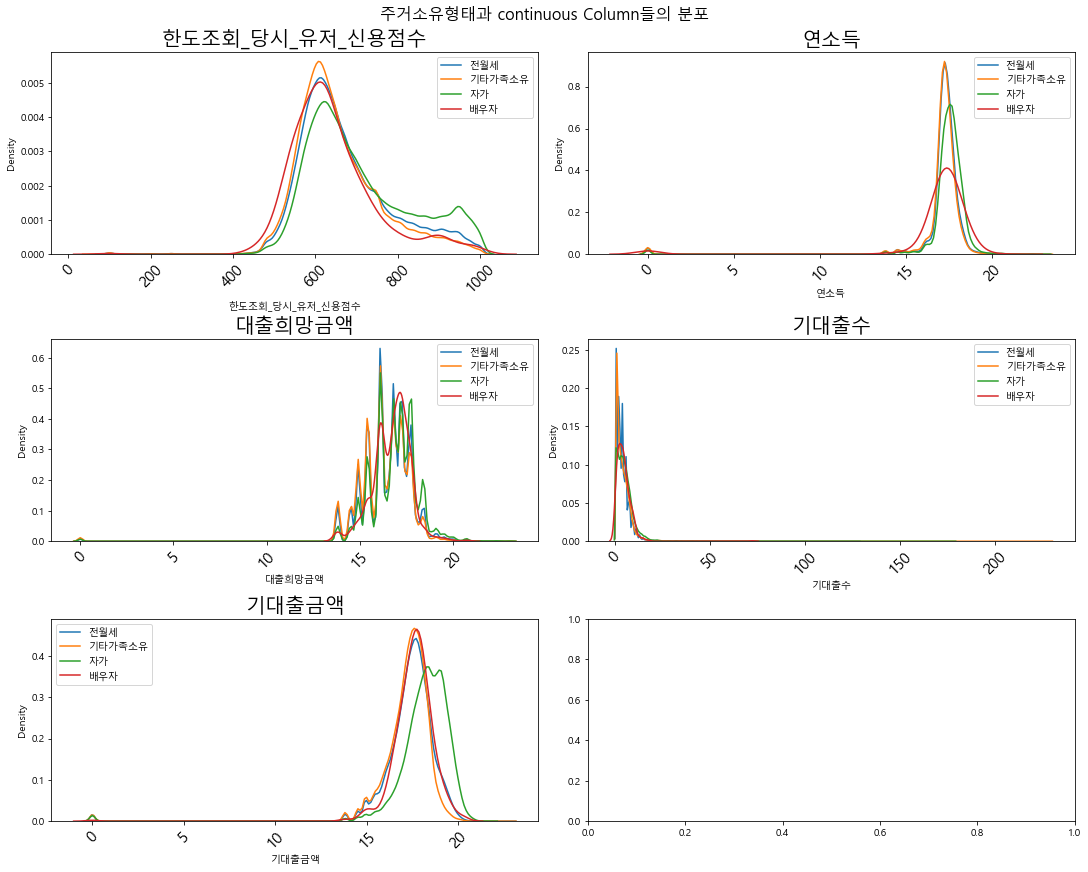

In [133]:
fig,ax = plt.subplots(3,2,figsize=(15,12), constrained_layout=True)
ax = ax.flatten()
col = "주거소유형태"
fig.suptitle(col+'과 continuous Column들의 분포', fontsize=16)

for i in range(len(Numeric_features)):
    
    for index in user_df_isin_loan_log[col].value_counts().index:
        
        sns.distplot(user_df_isin_loan_log[user_df_isin_loan_log[col] == index][Numeric_features[i]], 
                      ax=ax[i], hist = False,label= index)

        ax[i].set_title(Numeric_features[i],fontsize=20)
        #ax[i].set(title = Numeric_features[i],fontsize=16)

        ax[i].tick_params(axis='x', labelsize=15, rotation=45)
        ax[i].legend()
    
plt.show()


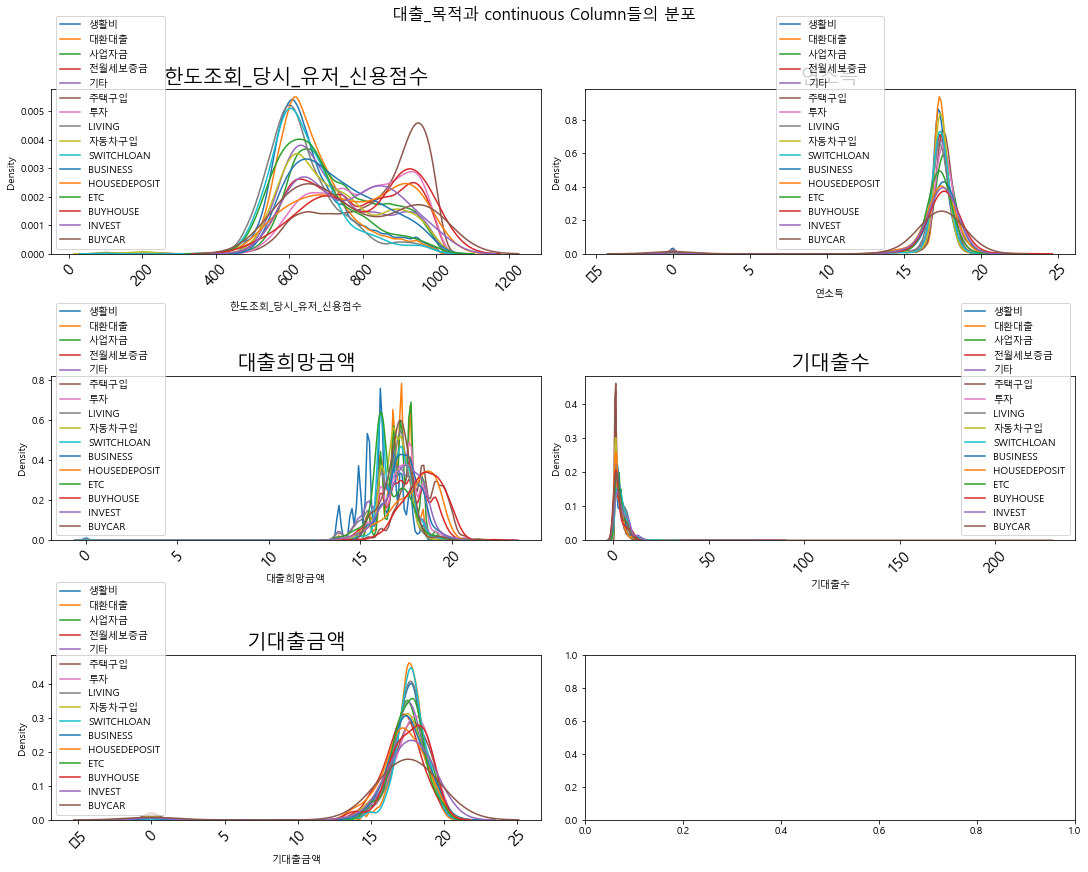

In [134]:
fig,ax = plt.subplots(3,2,figsize=(15,12), constrained_layout=True)
ax = ax.flatten()
col = "대출_목적"
fig.suptitle(col+'과 continuous Column들의 분포', fontsize=16)

for i in range(len(Numeric_features)):
    
    for index in user_df_isin_loan_log[col].value_counts().index:
        
        sns.distplot(user_df_isin_loan_log[user_df_isin_loan_log[col] == index][Numeric_features[i]], 
                      ax=ax[i], hist = False,label= index)

        ax[i].set_title(Numeric_features[i],fontsize=20)
        #ax[i].set(title = Numeric_features[i],fontsize=16)

        ax[i].tick_params(axis='x', labelsize=15, rotation=45)
        ax[i].legend()
    
plt.show()


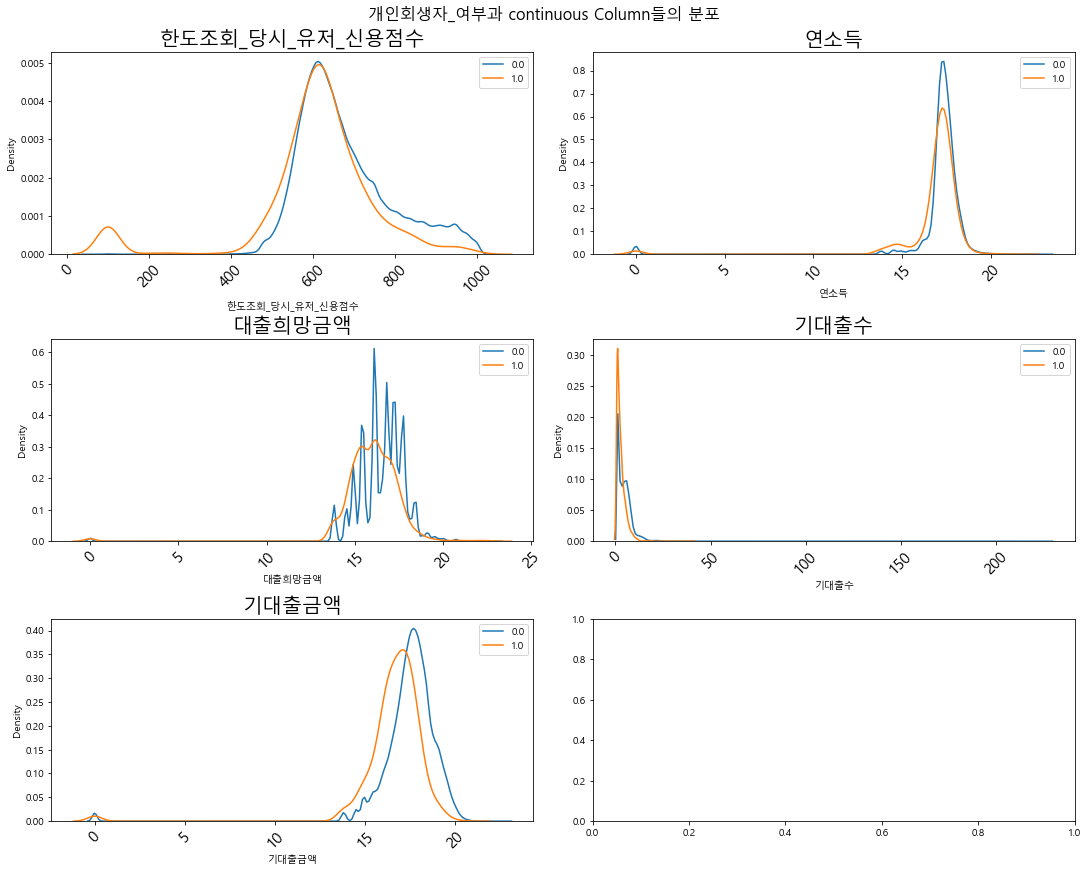

In [135]:
fig,ax = plt.subplots(3,2,figsize=(15,12), constrained_layout=True)
ax = ax.flatten()
col = "개인회생자_여부"
fig.suptitle(col+'과 continuous Column들의 분포', fontsize=16)

for i in range(len(Numeric_features)):
    
    for index in user_df_isin_loan_log[col].value_counts().index:
        
        sns.distplot(user_df_isin_loan_log[user_df_isin_loan_log[col] == index][Numeric_features[i]], 
                      ax=ax[i], hist = False,label= index)

        ax[i].set_title(Numeric_features[i],fontsize=20)
        #ax[i].set(title = Numeric_features[i],fontsize=16)

        ax[i].tick_params(axis='x', labelsize=15, rotation=45)
        ax[i].legend()
    
plt.show()


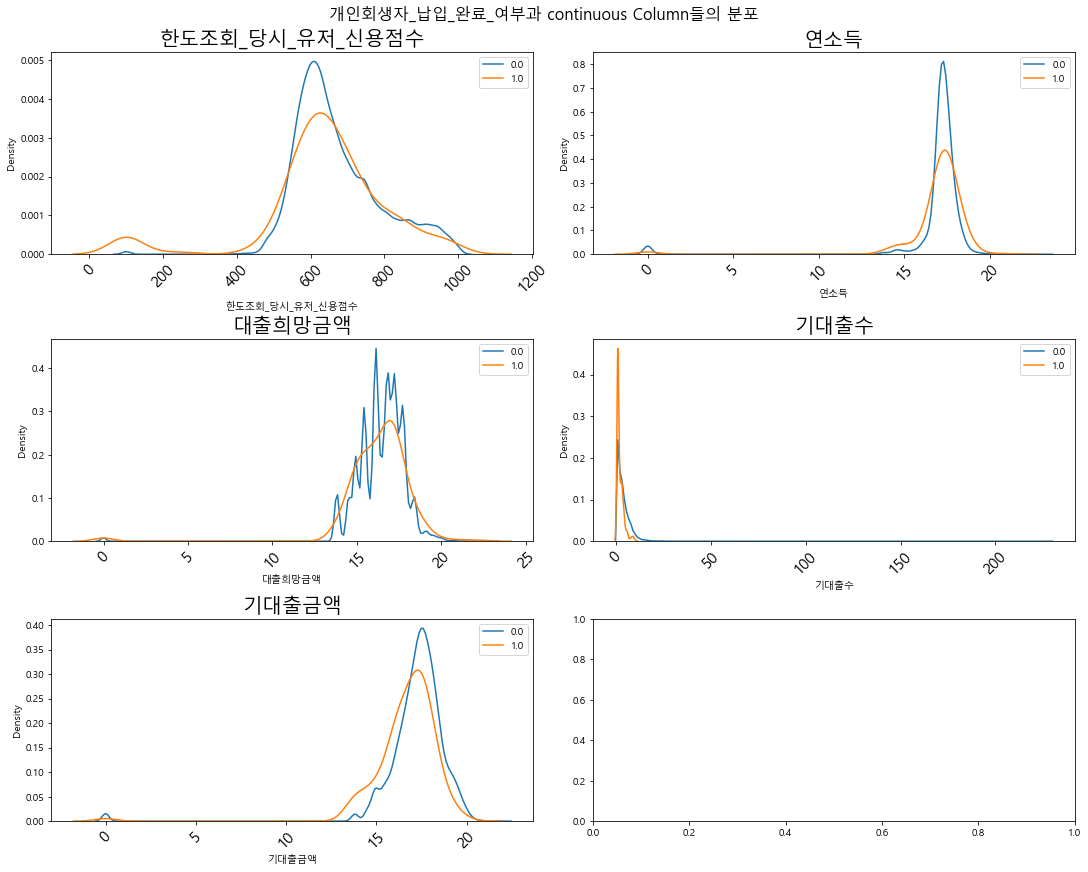

In [136]:
fig,ax = plt.subplots(3,2,figsize=(15,12), constrained_layout=True)
ax = ax.flatten()
col = "개인회생자_납입_완료_여부"
fig.suptitle(col+'과 continuous Column들의 분포', fontsize=16)

for i in range(len(Numeric_features)):
    
    for index in user_df_isin_loan_log[col].value_counts().index:
        
        sns.distplot(user_df_isin_loan_log[user_df_isin_loan_log[col] == index][Numeric_features[i]], 
                      ax=ax[i], hist = False,label= index)

        ax[i].set_title(Numeric_features[i],fontsize=20)
        #ax[i].set(title = Numeric_features[i],fontsize=16)

        ax[i].tick_params(axis='x', labelsize=15, rotation=45)
        ax[i].legend()
    
plt.show()
